<div style="text-align:center; font-size:30px; color:blue;"><b><u>Credit Card Fraud Detection Capstone Project</u></b></div>

# Introduction:

- The Credit Card Fraud Detection project is dedicated to enhancing financial security by utilizing advanced machine learning and data analysis techniques.

- The main objective is to develop a predictive model capable of effectively differentiating between legitimate and fraudulent credit card transactions.

- By harnessing machine learning, specifically supervised learning and anomaly detection, this project tackles the evolving nature of fraud patterns, moving beyond the limitations of traditional rule-based systems.

- Key elements include data preprocessing, feature engineering, model selection, and the use of evaluation metrics.

- This project explores various machine learning algorithms, such as logistic regression, decision trees, random forests, and support vector machines, with the aim of identifying the most effective method for fraud detection.

- Ultimately, the goal is to provide a robust, efficient, and adaptive solution to protect financial transactions from the constantly changing landscape of fraudulent activities.

# Project Objectives

- The aim of this project is to utilize machine learning models to predict fraudulent credit card transactions. The process generally includes preprocessing and exploring the dataset, which may consist of features like transaction amount, location, time, and past transaction history.

- Following the division of the dataset into training and testing sets, various machine learning algorithms such as logistic regression, decision trees, random forests, and support vector machines can be applied to construct predictive models.

- These models are trained on a labeled dataset where instances of fraudulent and legitimate transactions are identified. Evaluation metrics such as precision, recall, and the F1 score are typically used to gauge the model's performance. Continuous refinement might involve tuning hyperparameters, using ensemble methods, or exploring more advanced techniques like anomaly detection.

- The ultimate objective is for the final model to accurately identify and prevent fraudulent credit card transactions by learning patterns from historical data.

# Understanding and defining fraud

Credit card fraud encompasses any deceitful action or behavior intended to acquire information without proper authorization from the account holder for financial gain. Among various methods of committing fraud, skimming is the most prevalent. Skimming involves duplicating information stored on the magnetic strip of the card. Besides skimming, other common methods include:

- Manipulation/Alteration of Genuine Cards: This technique involves tampering with authentic cards to change their information or functionalities. Fraudsters may alter the card details or encoding to facilitate unauthorized transactions.

- Creation of Counterfeit Cards: Fraudsters produce fake cards that replicate the details of legitimate cards. These counterfeit cards are often created using advanced technology to mimic the appearance and functionality of real credit cards, making it challenging to detect their fraudulent nature.

- Theft/Loss of Credit Cards: Physical theft or loss of credit cards remains a significant method of fraud. Stolen cards can be used for unauthorized transactions before the cardholder notices the loss and reports it to the issuing bank.

- Fraudulent Telemarketing: In this scheme, scammers use deceptive telemarketing techniques to trick individuals into providing their credit card information. They may pose as representatives from legitimate companies or offer fake prizes and services to lure victims into sharing their sensitive information.

These methods highlight the diverse and evolving tactics used by fraudsters to exploit credit card systems for illicit financial gain.

# Problem Statement:

The focus of this project is to employ machine learning models to predict and identify fraudulent credit card transactions.

# Business Problem Overview:

- Retention of Profitable Clients:

For many banks, maintaining relationships with highly profitable clients is crucial. However, the increasing incidence of banking fraud poses a significant threat to this goal. The financial losses incurred, along with the potential damage to the bank's reputation and customer trust, are major concerns.

- Projected Losses Due to Fraud:

The Nilson Report highlights a staggering prediction: global losses due to banking fraud could reach $30 billion by 2020. This alarming statistic underscores the urgency for banks to adopt more sophisticated fraud detection methods as digital payment methods become more widespread and fraud techniques evolve.

- Necessity of Machine Learning in Fraud Detection:

In the current landscape, machine learning-based fraud detection systems are not just a trend but a necessity. These systems enable banks to implement proactive monitoring and fraud prevention strategies. By leveraging machine learning, banks can significantly reduce the time and resources spent on manual transaction reviews, mitigate the costs associated with chargebacks and fraudulent transactions, and avoid mistakenly rejecting legitimate transactions.
By addressing these points, the project aims to provide a robust solution to the growing problem of credit card fraud, ultimately safeguarding both banks and their customers from the financial and reputational risks associated with fraudulent activities.

# About the Dataset

- The dataset is sourced from Kaggle and comprises a total of 284,807 transactions, out of which 492 are fraudulent. Given the highly imbalanced nature of the dataset, it is crucial to address this imbalance prior to model building.

- It is imperative for credit card companies to accurately detect fraudulent transactions to ensure customers are not erroneously billed for purchases they did not make.

- The dataset includes credit card transactions made by European cardholders in September 2013. It captures transactions over a span of two days, where 492 out of 284,807 transactions are fraudulent, making the positive class (fraudulent transactions) a mere 0.172% of the total.

- The dataset consists solely of numerical input variables derived from a PCA transformation. Due to confidentiality constraints, the original features and additional background information cannot be disclosed. Features V1, V2, ..., V28 represent the principal components obtained via PCA, while 'Time' and 'Amount' are the only features not transformed. The 'Time' feature indicates the seconds elapsed between each transaction and the first transaction in the dataset. The 'Amount' feature denotes the transaction amount, which can be useful for example-dependent cost-sensitive learning. The 'Class' feature is the target variable, with 1 indicating fraud and 0 indicating non-fraud.

- Given the class imbalance, it is recommended to measure accuracy using the Area Under the Precision-Recall Curve (AUPRC), as traditional accuracy metrics are not meaningful for imbalanced datasets.

In [1]:
# Importing computational packages
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

## Exploratory data analysis

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
import pathlib

# Define the file path
file_path = pathlib.Path("/content/gdrive/MyDrive/creditcard.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking no. of rows and columns of dataset
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#observe the different feature type present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Missing Value Check

In [7]:
(df.isnull().mean()*100)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

Here we will observe the distribution of our classes

**we can observe from above dataframe that there are no missing values in the data**

In [8]:
# Checking the class balance
classes=df['Class'].value_counts()
normal_share=round(classes[0]/df['Class'].count()*100,2)
fraud_share=round(classes[1]/df['Class'].count()*100,2)
print(normal_share,fraud_share)

99.83 0.17


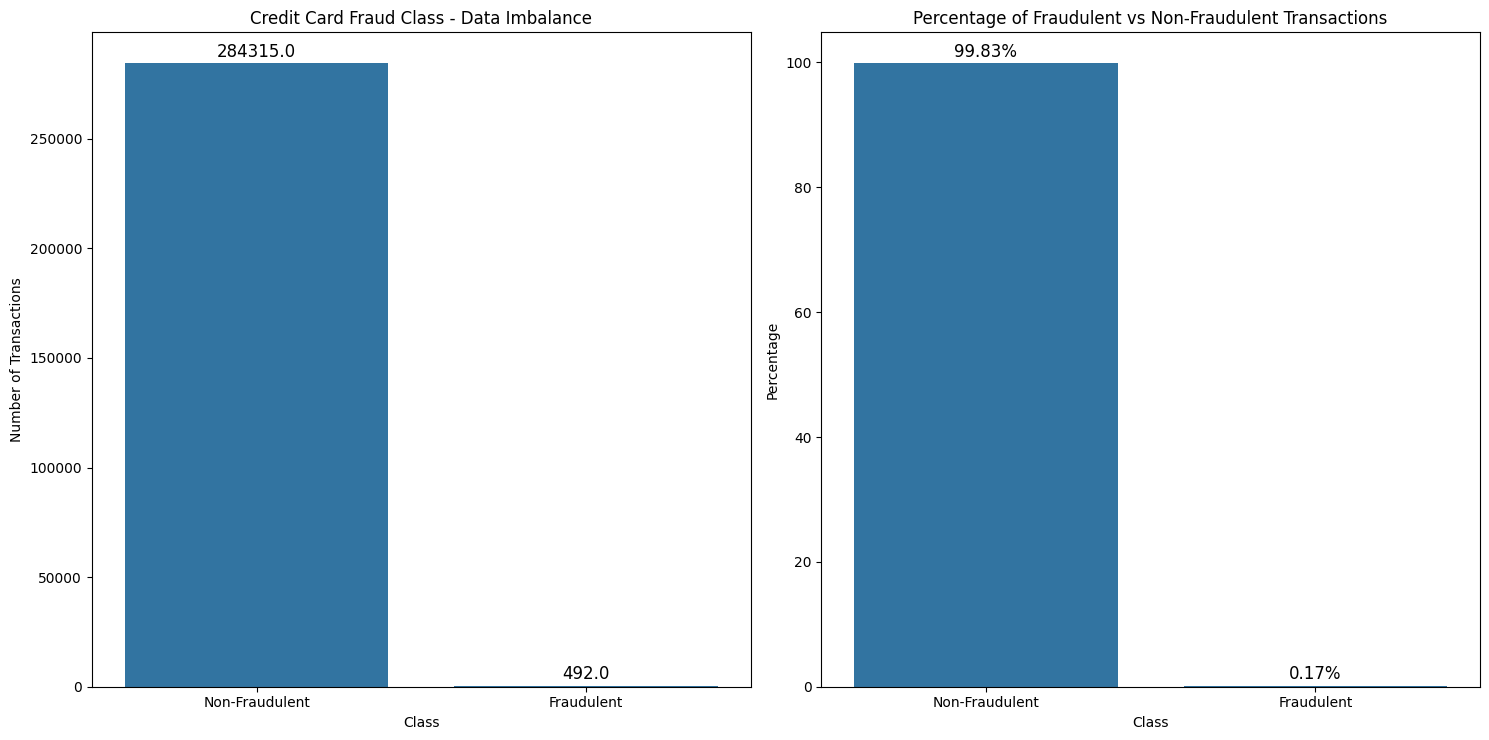

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations

fraud_percentage_data = {
    'Class': ['Non-Fraudulent', 'Fraudulent'],
    'Percentage': [normal_share, fraud_share]
}
df_fraud_percentage = pd.DataFrame(fraud_percentage_data)

# Plot the bar plots
plt.figure(figsize=(15, 7.5))

# Subplot 1: Number of transactions
plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Class', data=df)
plt.ylabel("Number of Transactions")
plt.xlabel("Class")
plt.title("Credit Card Fraud Class - Data Imbalance")
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Annotate the number of transactions
for p in ax1.patches:
    count = p.get_height()
    ax1.annotate(f'{count}', (p.get_x() + p.get_width() / 2., count),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

# Subplot 2: Percentage of fraudulent vs non-fraudulent transactions
plt.subplot(1, 2, 2)
ax2 = sns.barplot(x='Class', y='Percentage', data=df_fraud_percentage)
plt.ylabel("Percentage")
plt.title("Percentage of Fraudulent vs Non-Fraudulent Transactions")

# Annotate the percentage of transactions
for p in ax2.patches:
    percentage = p.get_height()
    ax2.annotate(f'{percentage}%', (p.get_x() + p.get_width() / 2., percentage),
                 ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


**From above graphs we can observe the dataset has very high class imbalance. Only 492 records are there among 284807 records which are labeld as fradudulent transaction**

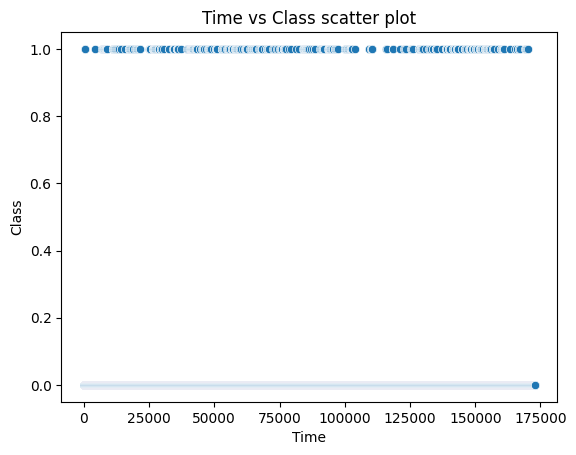

In [10]:
# Create a scatter plot to observe the distribution of classes with time
sns.scatterplot(x="Time", y="Class", data=df)
plt.title("Time vs Class scatter plot")
plt.show()


**No significant insight can be derived from above graph as both classes fraud and non-fraud are evenly distributed over time**

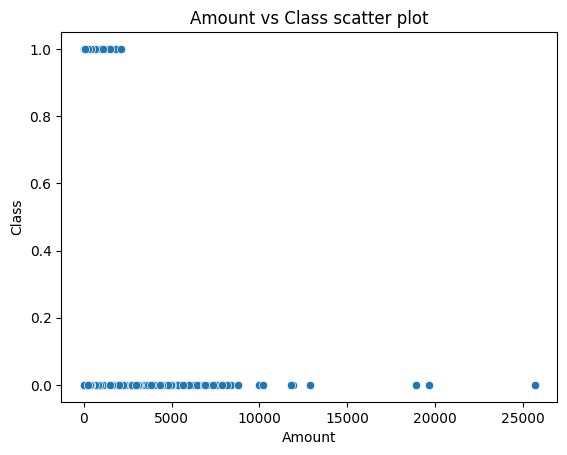

In [11]:
# Create a scatter plot to observe the distribution of classes with Amount
sns.scatterplot(x="Amount", y="Class", data=df)
plt.title("Amount vs Class scatter plot")
plt.show()


**From above class its clearly observed that low amount transactions are most likely to be fraudent**

In [12]:
# Drop unnecessary columns
# Since time column is not providing any useful insight and wont contribute much to our model, hence we can drop it
df=df.drop("Time",axis=1)

<Figure size 640x480 with 0 Axes>

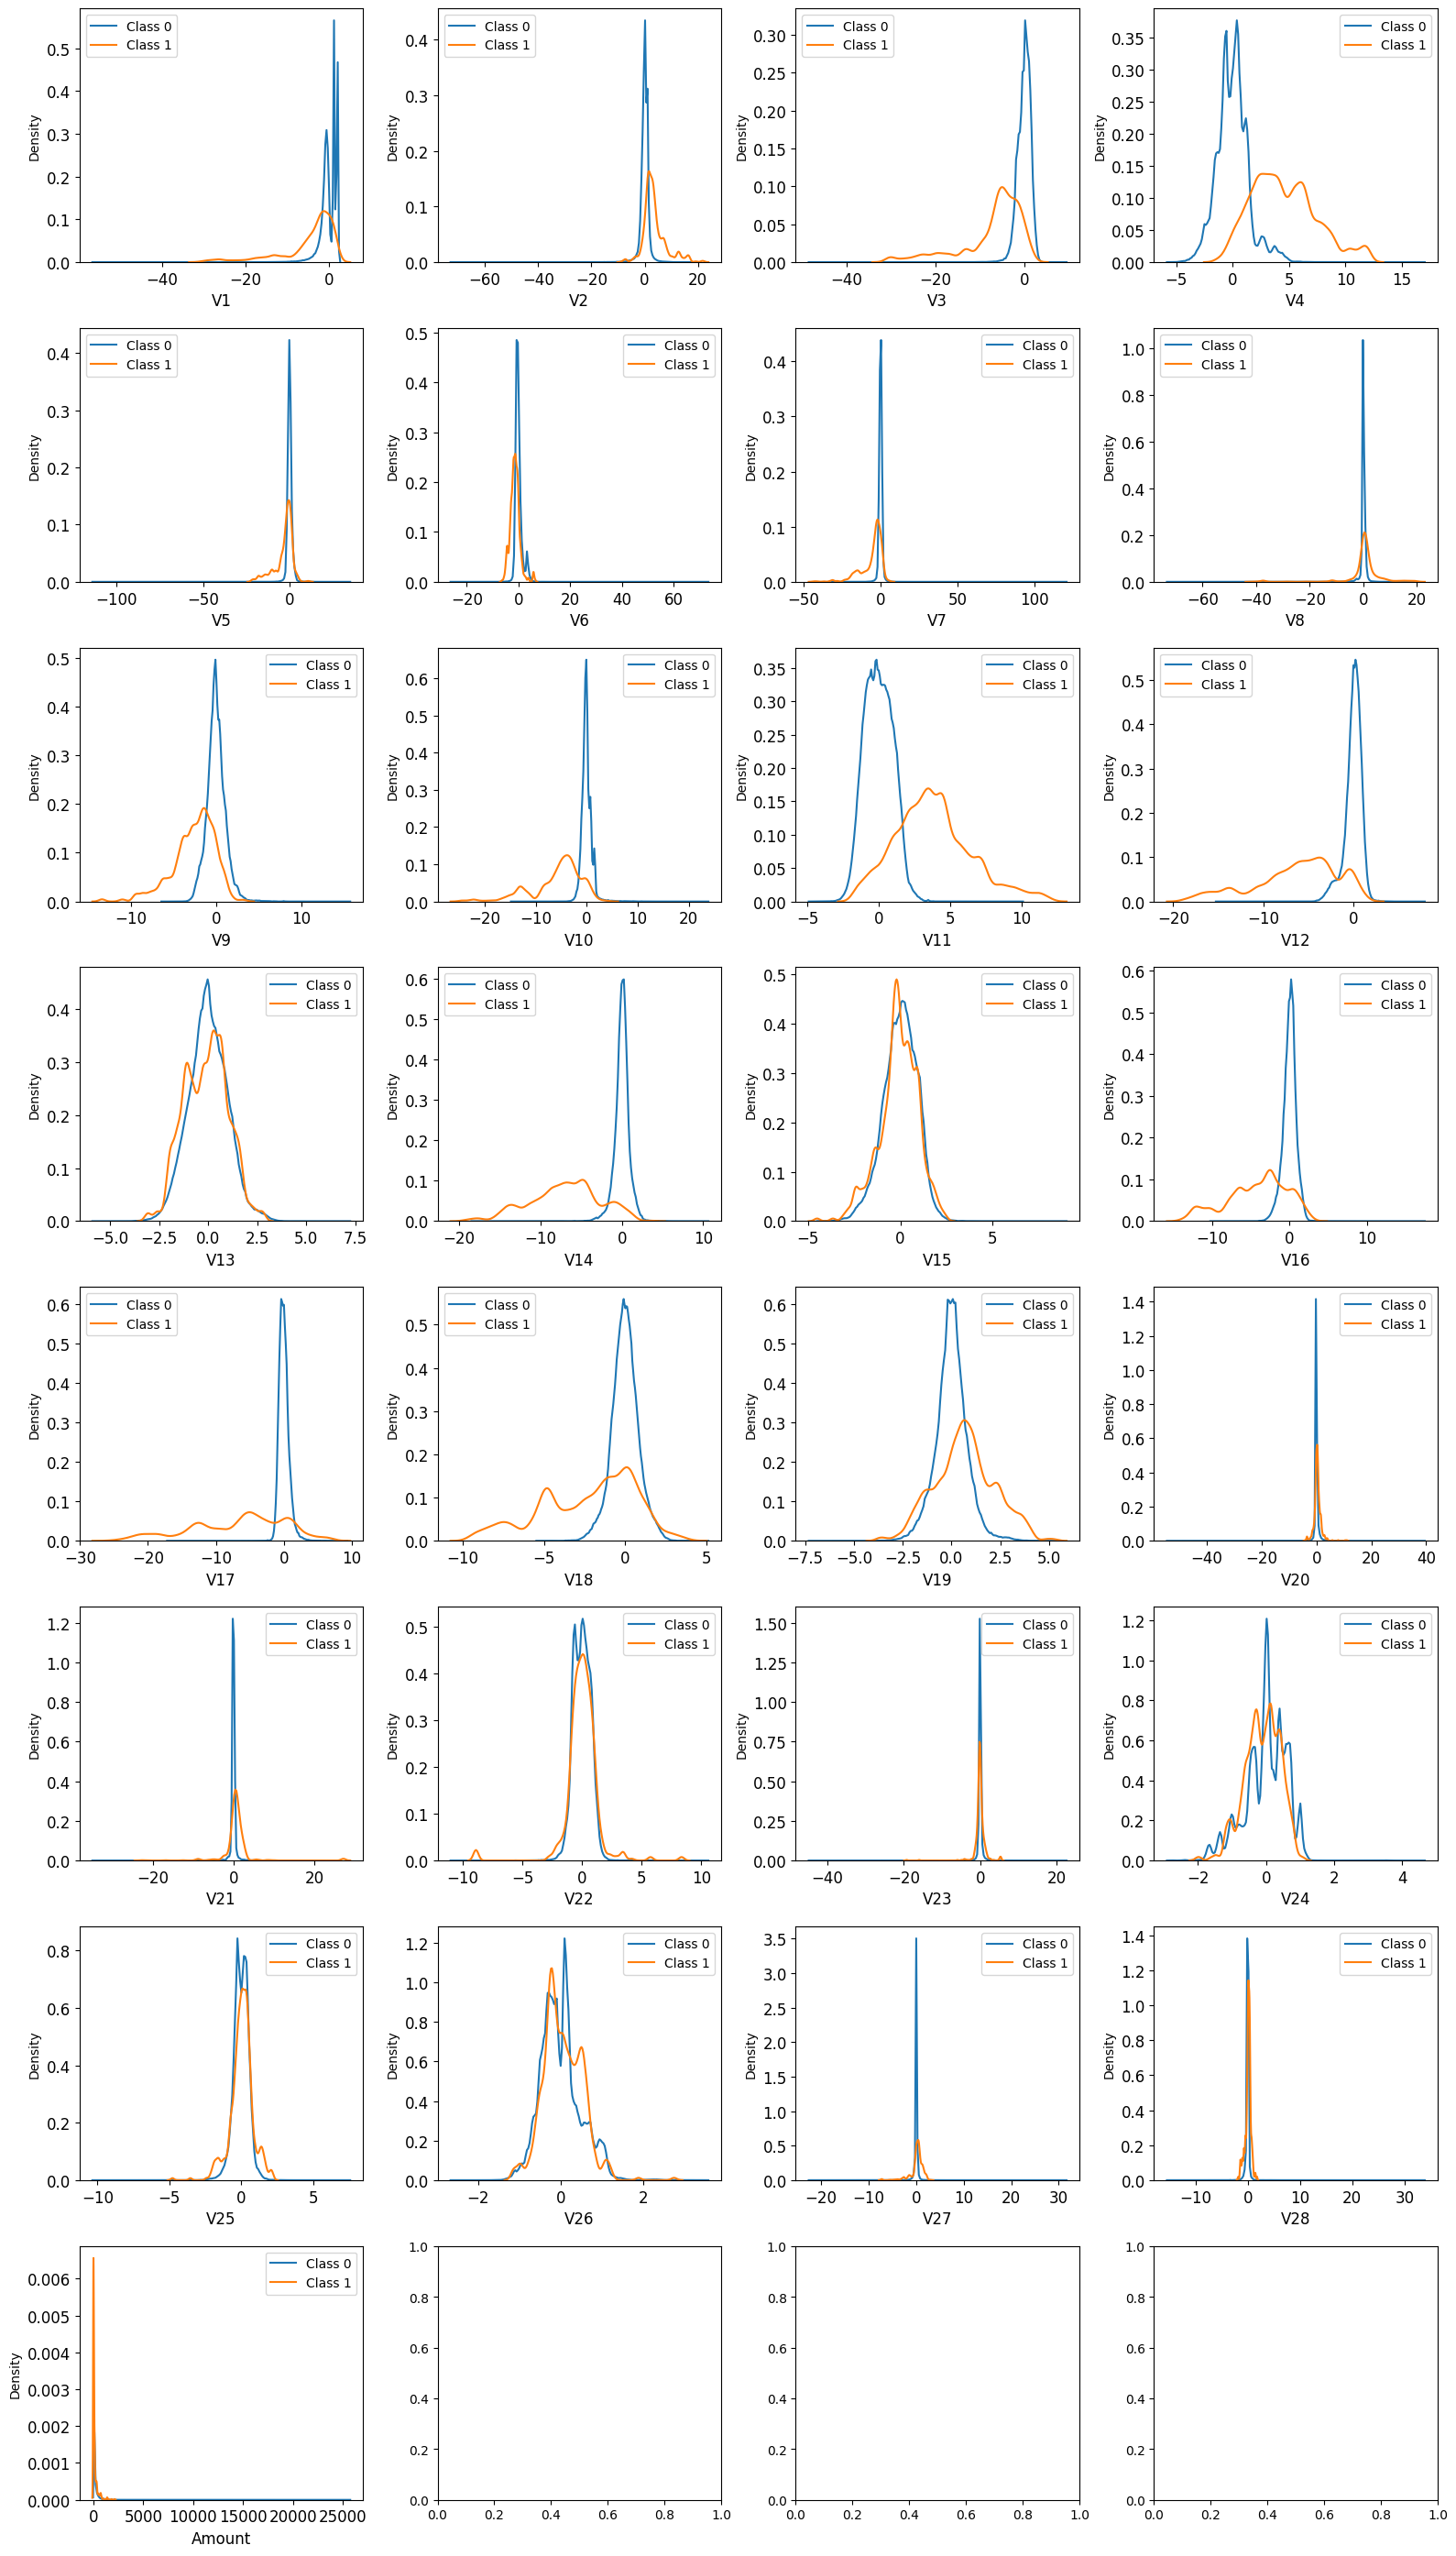

In [13]:
var = list(df.columns.values)
var.remove("Class")  # Dropping the 'Class' column from the list

t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

for i, feature in enumerate(var, 1):  # Loop through features with index starting from 1
    plt.subplot(8, 4, i)
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Class 0")
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Class 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend()

plt.tight_layout()
plt.show()


**We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions.**

### Stratified Splitting of the data into train & test data

In [14]:
y= df["Class"]
X = df.drop("Class", axis = 1)

In [15]:
# Stratified Spltting dataset into 70:30 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state = 100)

##### Preserve X_test & y_test to evaluate on the test data once you build the model

In [16]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
344
148


**Feature Scaling using Standard Scaler**

In [17]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount field
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [18]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
222925,2.053474,-0.149880,-1.092234,0.420978,-0.225796,-1.159629,0.082871,-0.236532,0.733270,0.102520,-0.908262,-0.220082,-1.216003,0.534920,0.227331,-0.103995,-0.158785,-0.802113,0.083010,-0.313465,-0.298362,-0.779702,0.362701,-0.048183,-0.356438,0.205392,-0.075806,-0.063325,-0.358200
163811,0.149477,1.112008,-0.391539,-0.557452,1.014727,-0.801985,1.042734,-0.167625,-0.200830,-0.863839,-0.537991,0.418586,1.034272,-1.222412,-0.349818,0.290628,0.298838,-0.333729,-0.226373,0.084311,-0.331768,-0.755443,0.079155,0.587098,-0.383245,0.110292,0.229167,0.086294,-0.352426
196038,2.145379,0.215237,-2.221643,-0.067032,0.815822,-1.358596,0.843943,-0.594243,0.009745,-0.021497,-0.476749,0.848265,1.144607,0.555759,0.285353,-0.661516,-0.362293,-0.647254,0.126100,-0.133286,0.153606,0.611995,-0.027494,0.824538,0.505014,0.203037,-0.083225,-0.069468,-0.344755
25173,-0.354219,0.100332,1.721509,-0.884417,-0.371977,-0.062313,-0.144740,0.163123,-1.843755,0.520706,1.627755,-0.263976,-0.100123,0.125968,0.703573,0.591865,0.665795,-1.191246,1.690163,0.295444,0.136969,0.217167,-0.014350,0.016538,-0.326120,-0.285113,0.118226,0.103791,-0.281240
253792,-0.439888,1.871311,-1.106687,1.064853,1.239594,-0.633668,1.100319,0.221096,-0.917002,-0.844362,-0.888776,-0.219374,-0.076494,-0.756161,-0.170227,-0.554555,1.442972,0.385060,0.585502,0.024939,0.059066,0.366613,-0.250861,0.494710,0.091257,-0.398552,0.330173,0.219909,-0.337537


In [19]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
262922,-0.548103,1.376074,0.051147,4.300577,1.761938,0.081805,1.788166,-0.302164,-2.941339,1.393164,-1.873436,-1.746983,-0.852186,1.058096,0.371916,-0.783216,0.322476,0.210874,1.701892,0.451713,0.316647,0.700714,-0.532490,-0.680250,1.232858,0.980223,-0.042880,0.053000,0.054772
123418,0.437324,1.824381,-2.299325,1.538479,0.791887,-1.414298,0.482083,0.339477,-0.674650,-1.234870,1.881042,-0.195098,-0.688822,-2.926057,0.427144,1.279861,2.651797,2.224899,-0.000361,-0.009730,-0.077049,-0.170282,0.108469,-0.365513,-0.436975,-0.393859,0.121535,-0.061320,-0.322318
206135,2.056846,0.042030,-1.296059,0.368958,0.032669,-1.349797,0.334441,-0.463096,0.452703,-0.016376,-0.526324,0.801353,1.006171,0.303048,0.637776,-0.262217,-0.553146,-0.181507,-0.244297,-0.167702,0.261879,0.949829,-0.018148,0.109873,0.295611,-0.115295,-0.015115,-0.054976,-0.320256
273483,-0.497480,0.785269,1.695245,-0.644791,0.491553,0.430883,0.510721,0.053386,0.552390,-0.545978,-1.545755,-0.957582,-0.913807,-0.066661,1.561068,0.043679,-0.672767,0.650035,1.013564,0.212146,-0.280792,-0.548862,-0.367317,-0.044278,0.430846,-0.657662,0.179848,-0.081837,-0.359396
245758,1.611949,-0.938343,-1.200421,0.653356,-0.386518,-0.465937,0.069881,-0.147945,0.849526,0.005008,-1.033421,-0.111964,-0.645005,0.305443,0.414153,0.183540,-0.410625,-0.207679,-0.171987,0.214406,0.081319,-0.184030,0.065733,0.742927,-0.283315,0.172087,-0.091352,-0.009690,0.575804


### Plotting the distribution of a variable

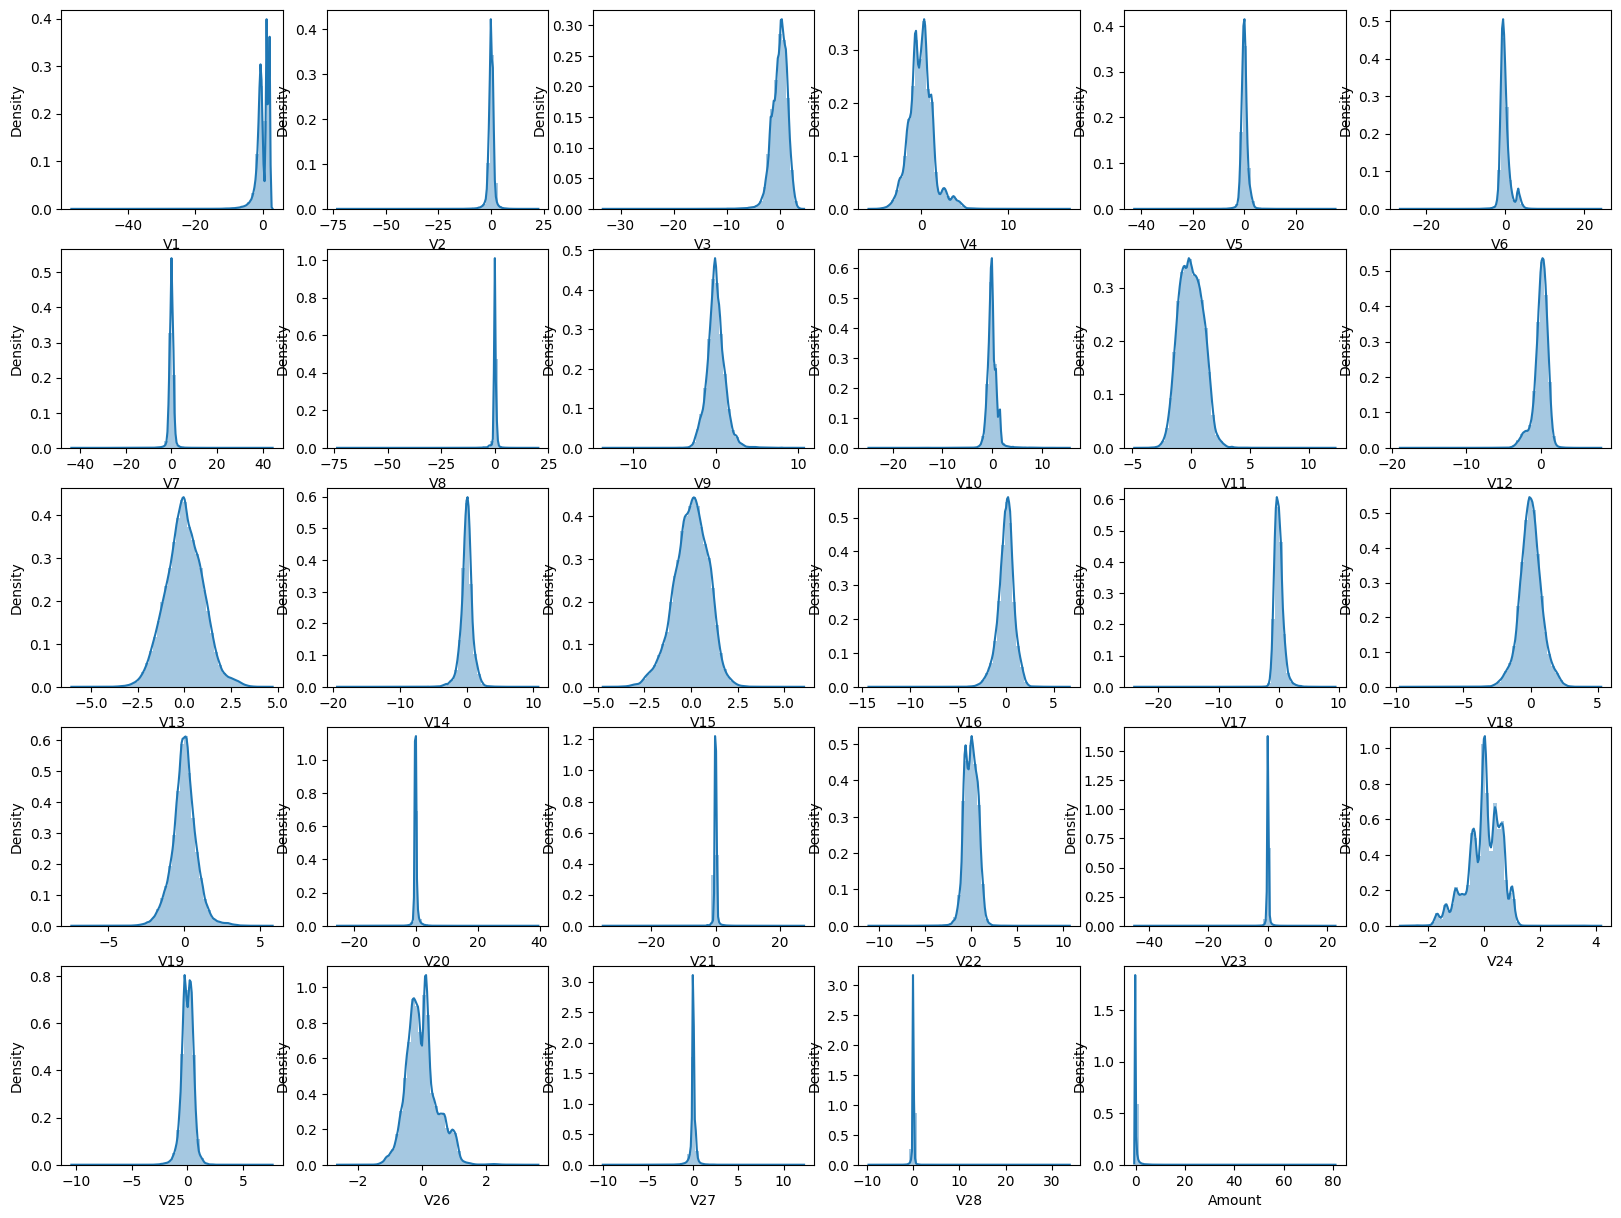

In [20]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

**Most of the features seem to be skewed from above graph. Hence we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use power transform to transform the data.**

In [21]:
# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.35278,-4.743314,-2.115044,0.671234,-0.335423,1.213213,-1.054441,-9.048266,0.524853,1.046184,0.337235,-2.187217,0.06793,-1.913552,-0.311223,-1.057503,-3.526079,-0.248354,0.11672,-1.377751,3.490872,-0.21869,-6.872356,-0.540695,-0.429101,0.567342,-2.175241,13.803155,13.52047


In [22]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['V1', 'V2', 'V3', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16', 'V17',
       'V20', 'V21', 'V23', 'V27', 'V28', 'Amount'],
      dtype='object', name='Features')


### If there is skewness present in the distribution use:
- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

In [23]:
# preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


# Transforming the test data
X_test[skewed] = pt.transform(X_test[skewed])

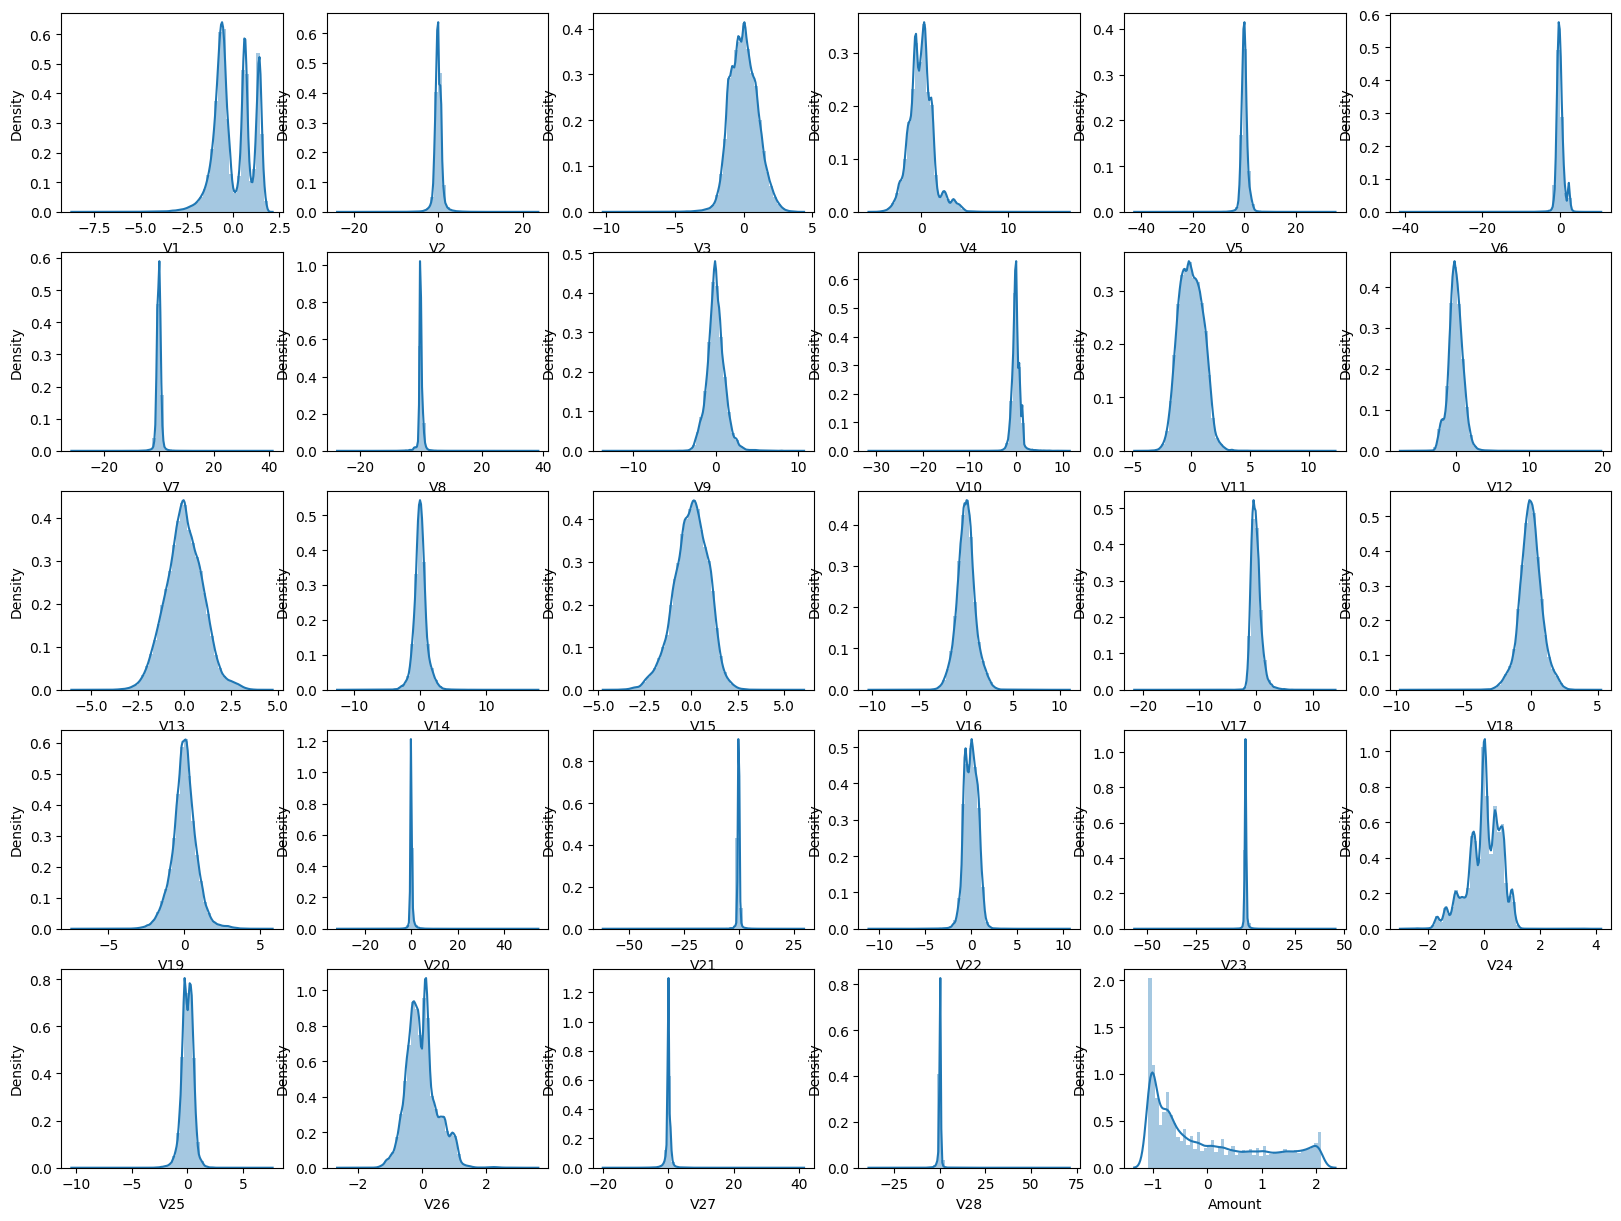

In [24]:
# plot the histogram of a variable from the dataset again to see the result
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

## Model Building For Imbalanced Data

We will try to build models using following ML algorithms
1. Logistic Regression
2. Decision Tree
3. XGBoost

## MODEL 1: LOGISTIC REGRESSION WITH IMBALANCED DATA

In [25]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv_log_imb = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True, random_state=4)

# Fit the model
model_cv_log_imb.fit(X_train, y_train)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_log_imb.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_log_imb.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9823317421521154
Best hyperparameters:  {'C': 0.01}


**Building Logistic Regression with optimal C**

In [26]:
# Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

**Model evalution on the train set**

In [27]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [28]:
# Predictions on the train set
y_train_pred_imb_log = log_reg_imb_model.predict(X_train)

In [29]:
display_scores(y_train, y_train_pred_imb_log)

F1 Score: 75.17%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.64      0.75       344

    accuracy                           1.00    199364
   macro avg       0.95      0.82      0.88    199364
weighted avg       1.00      1.00      1.00    199364



In [30]:
# Printing Recall
recall_train_imb_log = round(metrics.recall_score(y_train, y_train_pred_imb_log),4)
print("Recall on train data:",recall_train_imb_log)

Recall on train data: 0.6424


In [31]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [32]:
y_train_pred_proba_imb_log = log_reg_imb_model.predict_proba(X_train)[:,1]

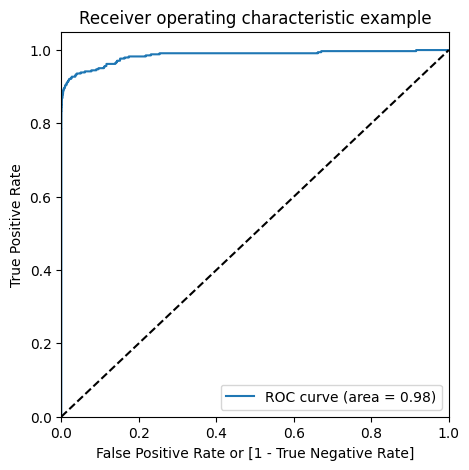

In [33]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_log)

In [34]:
auc_train_imb_log = round(roc_auc_score(y_train, y_train_pred_proba_imb_log),2)
print("Area under ROC curve (AUC):",auc_train_imb_log)

Area under ROC curve (AUC): 0.98


**Evaluating the model on the test set**

In [35]:
# Making prediction on the test set
y_test_pred_imb_log = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred_imb_log)

F1 Score: 68.55%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.57      0.69       148

    accuracy                           1.00     85443
   macro avg       0.92      0.79      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [36]:
# Printing Recall
recall_test_imb_log = round(metrics.recall_score(y_test, y_test_pred_imb_log),4)
print("Recall on test data:", recall_test_imb_log)

Recall on test data: 0.5743


In [37]:
# Predicted probability
y_test_pred_proba_imb_log = log_reg_imb_model.predict_proba(X_test)[:,1]

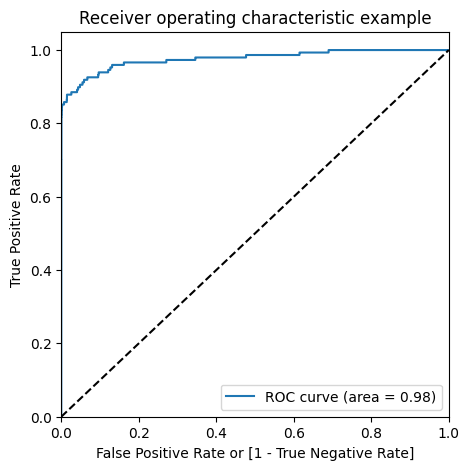

In [38]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_imb_log)

In [39]:
auc_test_imb_log = round(roc_auc_score(y_test, y_test_pred_proba_imb_log),2)
print("Area under ROC curve (AUC):", auc_test_imb_log)

Area under ROC curve (AUC): 0.98


In [40]:
# Printing key observations
data_imb_log = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_imb_log, recall_test_imb_log],
    'AUC': [auc_train_imb_log, auc_test_imb_log]
}

df_imb_log = pd.DataFrame(data_imb_log)

# Print the DataFrame
print(df_imb_log)

  Dataset  Recall   AUC
0   Train  0.6424  0.98
1    Test  0.5743  0.98


## MODEL 2: DECISION TREE WITH IMBALANCED DATA

In [41]:
# Define the parameter grid for Decision Tree
params = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_split": [15, 20, 25, 30],
    "min_samples_leaf": [5, 10, 15, 20]
}

# Define the number of folds for cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation with RandomizedSearchCV
model_cv_dt_imb = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                                 param_distributions=params,
                                 scoring='roc_auc',
                                 cv=folds,
                                 n_jobs=-1,
                                 verbose=1,
                                 return_train_score=True,
                                 random_state=42)

# Perform hyperparameter tuning
model_cv_dt_imb.fit(X_train, y_train)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_dt_imb.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_dt_imb.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9165759028465077
Best hyperparameters:  {'min_samples_split': 15, 'min_samples_leaf': 20, 'max_depth': 4}


In [42]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier( random_state = 42,**model_cv_dt_imb.best_params_)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=15,
                       random_state=42)

**Model evalution on the train set**

In [43]:
# Predictions on the train set
y_train_pred_imb_dt = dt_imb_model.predict(X_train)

# Printing classification Report
display_scores(y_train, y_train_pred_imb_dt)

# Printing Recall
recall_train_imb_dt = round(metrics.recall_score(y_train, y_train_pred_imb_dt),4)
print("Recall on train data:",recall_train_imb_dt)

F1 Score: 84.96%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.91      0.80      0.85       344

    accuracy                           1.00    199364
   macro avg       0.95      0.90      0.92    199364
weighted avg       1.00      1.00      1.00    199364

Recall on train data: 0.7965


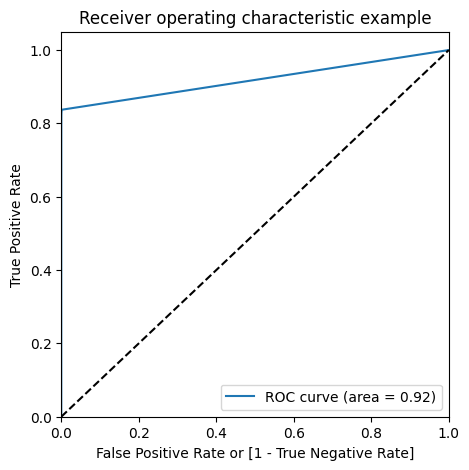

In [44]:
# Predicted probability
y_train_pred_proba_imb_dt = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_dt)

In [45]:
auc_train_imb_dt = round(roc_auc_score(y_train, y_train_pred_proba_imb_dt),2)
print("Area under ROC curve (AUC):",auc_train_imb_dt)

Area under ROC curve (AUC): 0.92


**Evaluating the model on the test set**

In [46]:
# Making prediction on the test set
y_test_pred_imb_dt = dt_imb_model.predict(X_test)

# Printing Classification Report
display_scores(y_test, y_test_pred_imb_dt)

# Printing Recall
recall_test_imb_dt = round(metrics.recall_score(y_test, y_test_pred_imb_dt),4)
print("Recall on test data:", recall_test_imb_dt)

F1 Score: 78.85%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.84      0.74      0.79       148

    accuracy                           1.00     85443
   macro avg       0.92      0.87      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Recall on test data: 0.7432


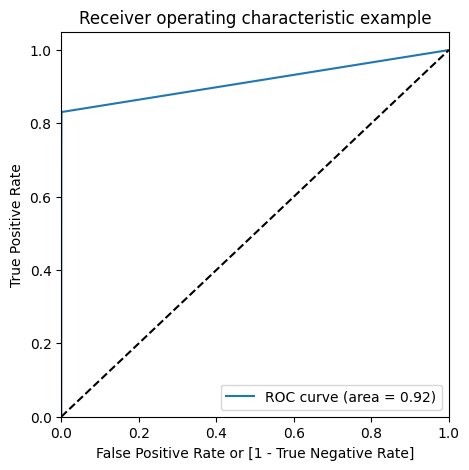

In [47]:
# Predicted probability
y_test_pred_proba_imb_dt = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_imb_dt)

In [48]:
auc_test_imb_dt = round(roc_auc_score(y_test, y_test_pred_proba_imb_dt),2)
print("Area under ROC curve (AUC):", auc_test_imb_dt)

Area under ROC curve (AUC): 0.92


In [49]:
# Printing key observations
data_imb_dt = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_imb_dt, recall_test_imb_dt],
    'AUC': [auc_train_imb_dt, auc_test_imb_dt]
}

df_imb_dt = pd.DataFrame(data_imb_dt)

# Print the DataFrame
print(df_imb_dt)

  Dataset  Recall   AUC
0   Train  0.7965  0.92
1    Test  0.7432  0.92


## MODEL 3: XGBOOST WITH IMBALANCED DATA

In [50]:
folds = 3

param_grid = {
    'n_estimators': [700,800,900],
    'learning_rate':[0.001, 0.005, 0.01],
    'max_depth': [2, 3, 4],
    'reg_lambda': [0.1,0.2,0.3,0.4,0.5],
    'reg_alpha': [0.07, 0.09, 0.1, 0.3],
    'min_child_weight': [5,6,7,8],
    'gamma': [1, 1.5, 2],
}

xgb_model = XGBClassifier()

model_cv_xgb_imb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=folds,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

model_cv_xgb_imb.fit(X_train, y_train)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_xgb_imb.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_xgb_imb.best_params_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9814492872435728
Best hyperparameters:  {'reg_lambda': 0.1, 'reg_alpha': 0.09, 'n_estimators': 800, 'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.01, 'gamma': 2}


In [51]:
# Model with optimal hyperparameters
xgb_imb_model = XGBClassifier( random_state = 42,**model_cv_xgb_imb.best_params_)

xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Evaluating the model on the train set**

In [52]:
# making predictions on Train Data
y_train_pred_imb_xgb = xgb_imb_model.predict(X_train)

# Printing Classification Report
display_scores(y_train, y_train_pred_imb_xgb)

# Printing Recall
recall_train_imb_xgb = round(metrics.recall_score(y_train, y_train_pred_imb_xgb),4)
print("Recall on train data:",recall_train_imb_xgb)

F1 Score: 89.86%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    199020
           1       0.97      0.84      0.90       344

    accuracy                           1.00    199364
   macro avg       0.98      0.92      0.95    199364
weighted avg       1.00      1.00      1.00    199364

Recall on train data: 0.8372


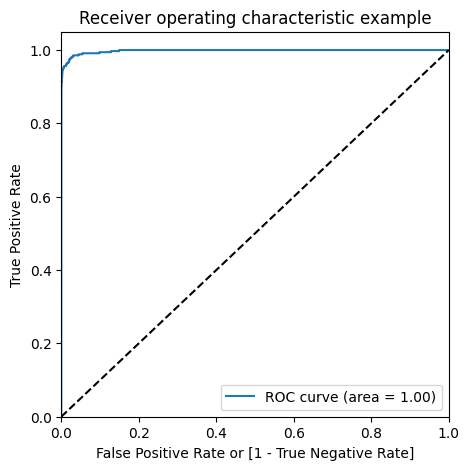

In [53]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [54]:
auc_train_imb_xgb = round(roc_auc_score(y_train, y_train_pred_proba_imb_xgb),2)
print("Area under ROC curve (AUC):",auc_train_imb_xgb)

Area under ROC curve (AUC): 1.0


**Evaluating the model on the test set**

In [55]:
# Predictions on the test set
y_test_pred_imb_xgb = xgb_imb_model.predict(X_test)

# Printing Classification Report
display_scores(y_test, y_test_pred_imb_xgb)

# Printing Recall
recall_test_imb_xgb = round(metrics.recall_score(y_test, y_test_pred_imb_xgb),4)
print("Recall on test data:", recall_test_imb_xgb)

F1 Score: 83.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.78      0.83       148

    accuracy                           1.00     85443
   macro avg       0.95      0.89      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Recall on test data: 0.777


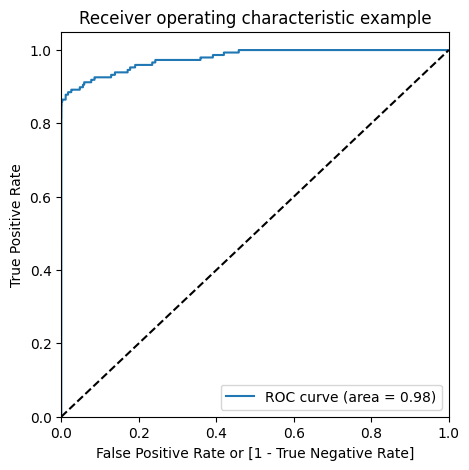

In [56]:
# Predicted probability
y_test_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_imb_xgb)

In [57]:
auc_test_imb_xgb = round(roc_auc_score(y_test, y_test_pred_proba_imb_xgb),2)
print("Area under ROC curve (AUC):", auc_test_imb_xgb)

Area under ROC curve (AUC): 0.98


In [58]:
# Printing key observations
data_imb_xgb = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_imb_xgb, recall_test_imb_xgb],
    'AUC': [auc_train_imb_xgb, auc_test_imb_xgb]
}

df_imb_xgb = pd.DataFrame(data_imb_xgb)

# Print the DataFrame
print(df_imb_xgb)

  Dataset  Recall   AUC
0   Train  0.8372  1.00
1    Test  0.7770  0.98


### Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 14
2nd Top var = 7
3rd Top var = 10


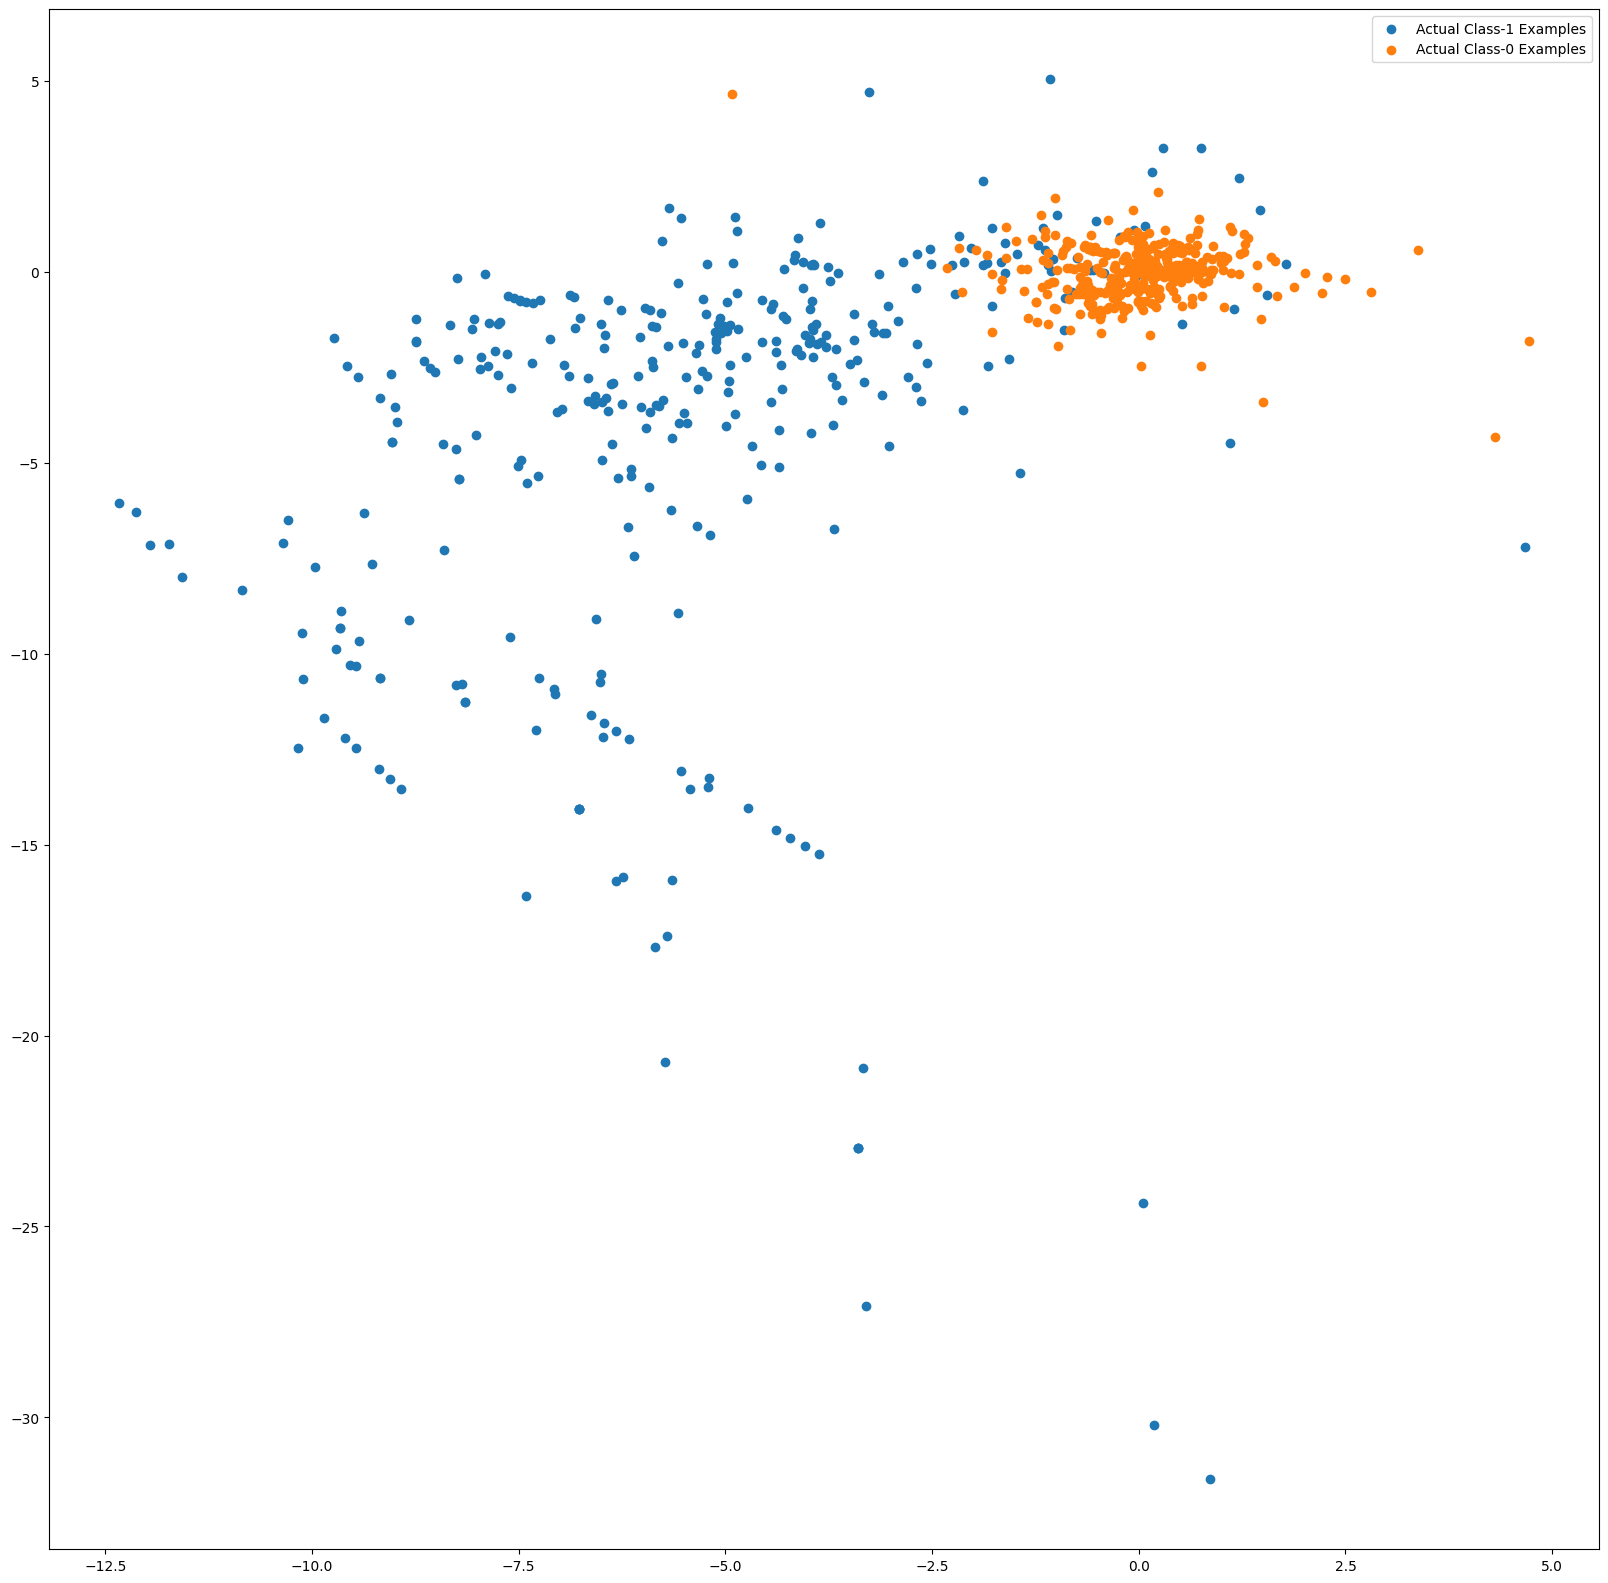

In [59]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

## Model building with balancing Classes

##### Perform class balancing with :
- Random Oversampling
- SMOTE
- ADASYN

### Print the class distribution after applying Random Oversampling

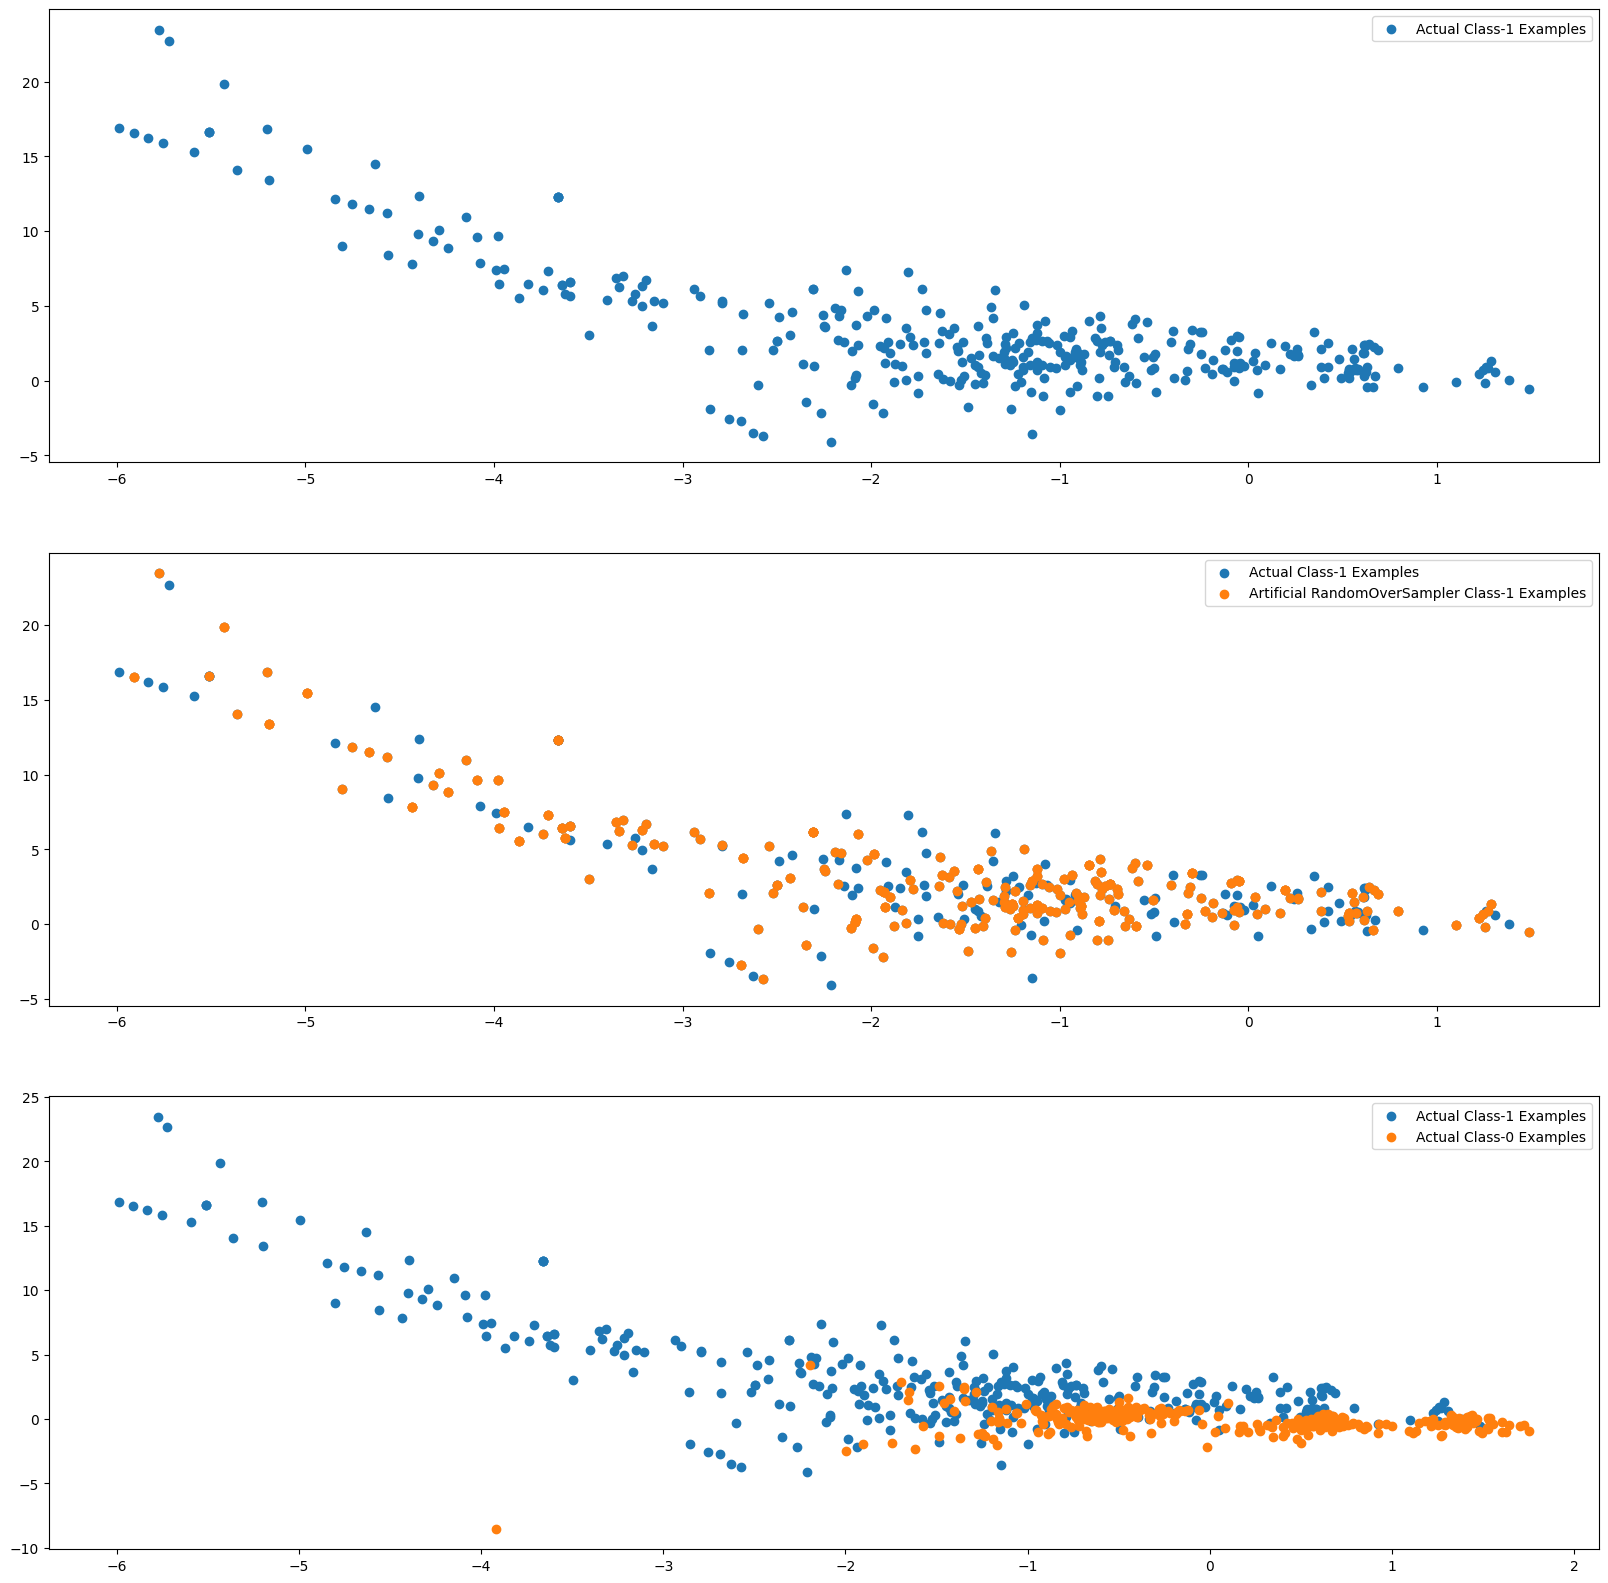

In [60]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_train_over, y_train_over = ros.fit_resample(X_train, y_train)


X_train_resampled_1 = X_train_over[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_resampled_1.iloc[:X_train_1.shape[0], 0], X_train_resampled_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial RandomOverSampler Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()

In [61]:
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [62]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 199020, 1: 344})
New class distribution:- Counter({0: 199020, 1: 199020})


## Model 4: Logistic Regression with Random Oversampling

In [63]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv_log_over = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True, random_state=4)

# Fit the model
model_cv_log_over.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_log_over.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_log_over.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.988649950383944
Best hyperparameters:  {'C': 1000}


In [64]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

**Evaluation on Train Dataset**

In [65]:
# Predictions on the train set
y_train_pred_over_log = logreg_over_model.predict(X_over)

# Printing scores
display_scores(y_over, y_train_pred_over_log)

# Printing Recall
recall_train_over_log = round(metrics.recall_score(y_over, y_train_pred_over_log),4)
print("Recall on train data:",recall_train_over_log)

F1 Score: 94.9%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Recall on train data: 0.9262


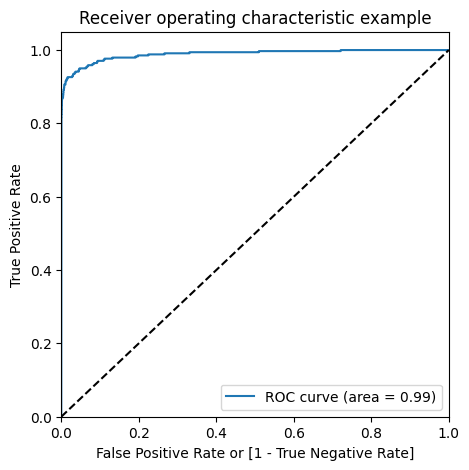

In [66]:
# Predicted probability
y_train_pred_proba_over_log = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba_over_log)

In [67]:
auc_train_over_log = round(roc_auc_score(y_over, y_train_pred_proba_over_log),2)
print("Area under ROC curve (AUC):",auc_train_over_log)

Area under ROC curve (AUC): 0.99


**Evaluation on Test Dataset**

In [68]:
# Evaluating on test data
y_test_pred_over_log = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_over_log)

# Printing Recall
recall_test_over_log = round(metrics.recall_score(y_test, y_test_pred_over_log),4)
print("Recall on test data:", recall_test_over_log)

F1 Score: 10.74%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Recall on test data: 0.8919


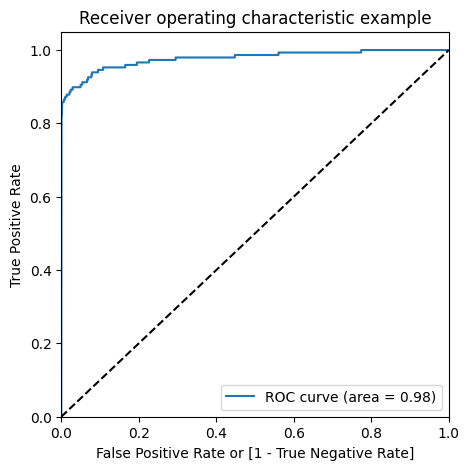

In [69]:
# Predicted probability
y_test_pred_proba_over_log = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_over_log)

In [70]:
auc_test_over_log = round(roc_auc_score(y_test, y_test_pred_proba_over_log),2)
print("Area under ROC curve (AUC):", auc_test_over_log)

Area under ROC curve (AUC): 0.98


In [71]:
# Printing key observations
data_over_log = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_over_log, recall_test_over_log],
    'AUC': [auc_train_over_log, auc_test_over_log]
}

df_over_log = pd.DataFrame(data_over_log)

# Print the DataFrame
print(df_over_log)

  Dataset  Recall   AUC
0   Train  0.9262  0.99
1    Test  0.8919  0.98


## Model 5: Decision Tree with Random Oversampling

In [72]:
# Define the parameter grid for Decision Tree
params = {
    "max_depth": [2,3,4],
    "min_samples_split": [20,25,30,35],
    "min_samples_leaf": [10,15,20, 25]
}

# Define the number of folds for cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation with RandomizedSearchCV
model_cv_dt_over = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                              param_distributions=params,
                              scoring='roc_auc',
                              cv=folds,
                              n_jobs=-1,
                              verbose=1,
                              return_train_score=True,
                              random_state=42)

# Perform hyperparameter tuning
model_cv_dt_over.fit(X_over, y_over)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_dt_over.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_dt_over.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9825695775127586
Best hyperparameters:  {'min_samples_split': 20, 'min_samples_leaf': 20, 'max_depth': 4}


In [73]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier( random_state = 42,**model_cv_dt_over.best_params_)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, min_samples_split=20,
                       random_state=42)

**Model evalution on the train set**

In [74]:
# Predictions on the train set
y_train_pred_over_dt = dt_over_model.predict(X_over)

# Printing scores
display_scores(y_over, y_train_pred_over_dt)

# Printing Recall
recall_train_over_dt = round(metrics.recall_score(y_over, y_train_pred_over_dt),4)
print("Recall on train data:",recall_train_over_dt)

F1 Score: 96.19%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96    199020
           1       0.96      0.96      0.96    199020

    accuracy                           0.96    398040
   macro avg       0.96      0.96      0.96    398040
weighted avg       0.96      0.96      0.96    398040

Recall on train data: 0.9592


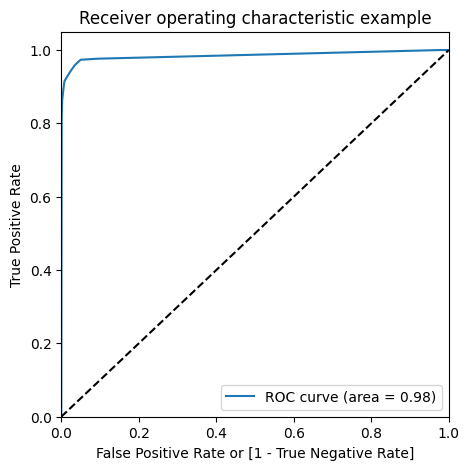

In [75]:
# Predicted probability
y_train_pred_prob_over_dt = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_prob_over_dt)

In [76]:
auc_train_over_dt = round(roc_auc_score(y_over, y_train_pred_prob_over_dt),2)
print("Area under ROC curve (AUC):",auc_train_over_dt)

Area under ROC curve (AUC): 0.98


**Evaluation on Test Dataset**

In [77]:
# Evaluating on test data
y_test_pred_over_dt = dt_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_over_dt)

# Printing Recall
recall_test_over_dt = round(metrics.recall_score(y_test, y_test_pred_over_dt),4)
print("Recall on test data:", recall_test_over_dt)

F1 Score: 8.03%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.04      0.87      0.08       148

    accuracy                           0.97     85443
   macro avg       0.52      0.92      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Recall on test data: 0.8716


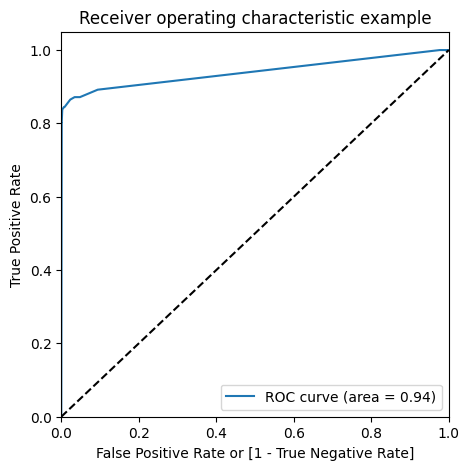

In [78]:
# Predicted probability
y_test_pred_proba_over_dt = dt_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_over_dt)

In [79]:
auc_test_over_dt = round(roc_auc_score(y_test, y_test_pred_proba_over_dt),2)
print("Area under ROC curve (AUC):", auc_test_over_dt)

Area under ROC curve (AUC): 0.94


In [80]:
# Printing key observations
data_over_dt = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_over_dt, recall_test_over_dt],
    'AUC': [auc_train_over_dt, auc_test_over_dt]
}

df_over_dt = pd.DataFrame(data_over_dt)

# Print the DataFrame
print(df_over_dt)

  Dataset  Recall   AUC
0   Train  0.9592  0.98
1    Test  0.8716  0.94


### Model  6: XGBoost with Random Oversampling

In [90]:
folds = 3

param_grid = {
    'n_estimators': [900,950,1000],
    'learning_rate': [0.001, 0.002, 0.003],
    'max_depth': [2, 3,4],
    'reg_lambda': [0.8,0.9,1],
    'reg_alpha': [0.4,0.5,0.6],
    'min_child_weight': [10,12,14,16],
    'gamma': [0.8,0.9,1],
}

xgb_model_bal = XGBClassifier()

model_cv_xgb_over = RandomizedSearchCV(
    estimator=xgb_model_bal,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=folds,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

model_cv_xgb_over.fit(X_over, y_over)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_xgb_over.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_xgb_over.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9969733506815291
Best hyperparameters:  {'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 1000, 'min_child_weight': 16, 'max_depth': 3, 'learning_rate': 0.003, 'gamma': 0.8}


In [91]:
# Model with optimal hyperparameters
xgb_over_model = XGBClassifier( random_state = 42,**model_cv_xgb_over.best_params_)

xgb_over_model.fit(X_over, y_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.8, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=16, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Model evalution on the train set**

In [92]:
# Making Prediction on Train Data
y_train_pred_over_xgb= xgb_over_model.predict(X_over)

# Printing Classification Report
display_scores(y_over, y_train_pred_over_xgb)

# Printing Recall
recall_train_over_xgb = round(metrics.recall_score(y_over, y_train_pred_over_xgb),4)
print("Recall on train data:",recall_train_over_xgb)

F1 Score: 96.56%
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97    199020
           1       0.98      0.95      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040

Recall on train data: 0.9471


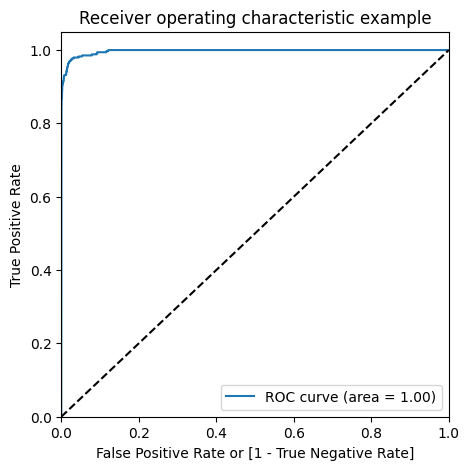

In [93]:
# Predicted probability
y_train_pred_proba_over_xgb = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba_over_xgb)

In [94]:
auc_train_over_xgb = round(roc_auc_score(y_over, y_train_pred_proba_over_xgb),2)
print("Area under ROC curve (AUC):",auc_train_over_xgb)

Area under ROC curve (AUC): 1.0


**Evaluation on Test Data**

In [95]:
# Predictions on the test set
y_test_pred_over_xgb = xgb_over_model.predict(X_test)

# Printing Classification Report
display_scores(y_test, y_test_pred_over_xgb)

# Printing Recall
recall_test_over_xgb = round(metrics.recall_score(y_test, y_test_pred_over_xgb),4)
print("Recall on test data:", recall_test_over_xgb)

F1 Score: 16.7%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.09      0.85      0.17       148

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Recall on test data: 0.8514


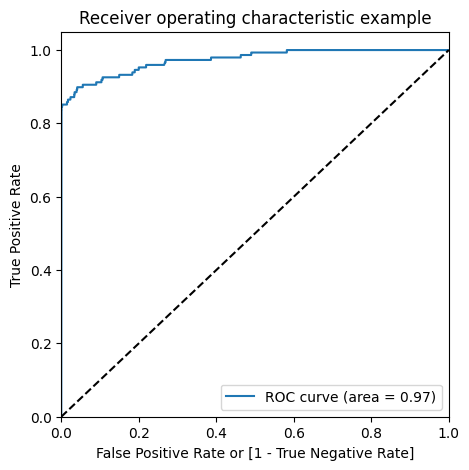

In [96]:
# Predicted probability
y_test_pred_proba_over_xgb = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_over_xgb)

In [97]:
auc_test_over_xgb = round(roc_auc_score(y_test, y_test_pred_proba_over_xgb),2)
print("Area under ROC curve (AUC):", auc_test_over_xgb)

Area under ROC curve (AUC): 0.97


In [98]:
# Printing key observations
data_over_xgb = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_over_xgb, recall_test_over_xgb],
    'AUC': [auc_train_over_xgb, auc_test_over_xgb]
}

df_over_xgb = pd.DataFrame(data_over_xgb)

# Print the DataFrame
print(df_over_xgb)

  Dataset  Recall   AUC
0   Train  0.9471  1.00
1    Test  0.8514  0.97


## SMOTE (Synthetic Minority Oversampling Technique)

### Print the class distribution after applying SMOTE

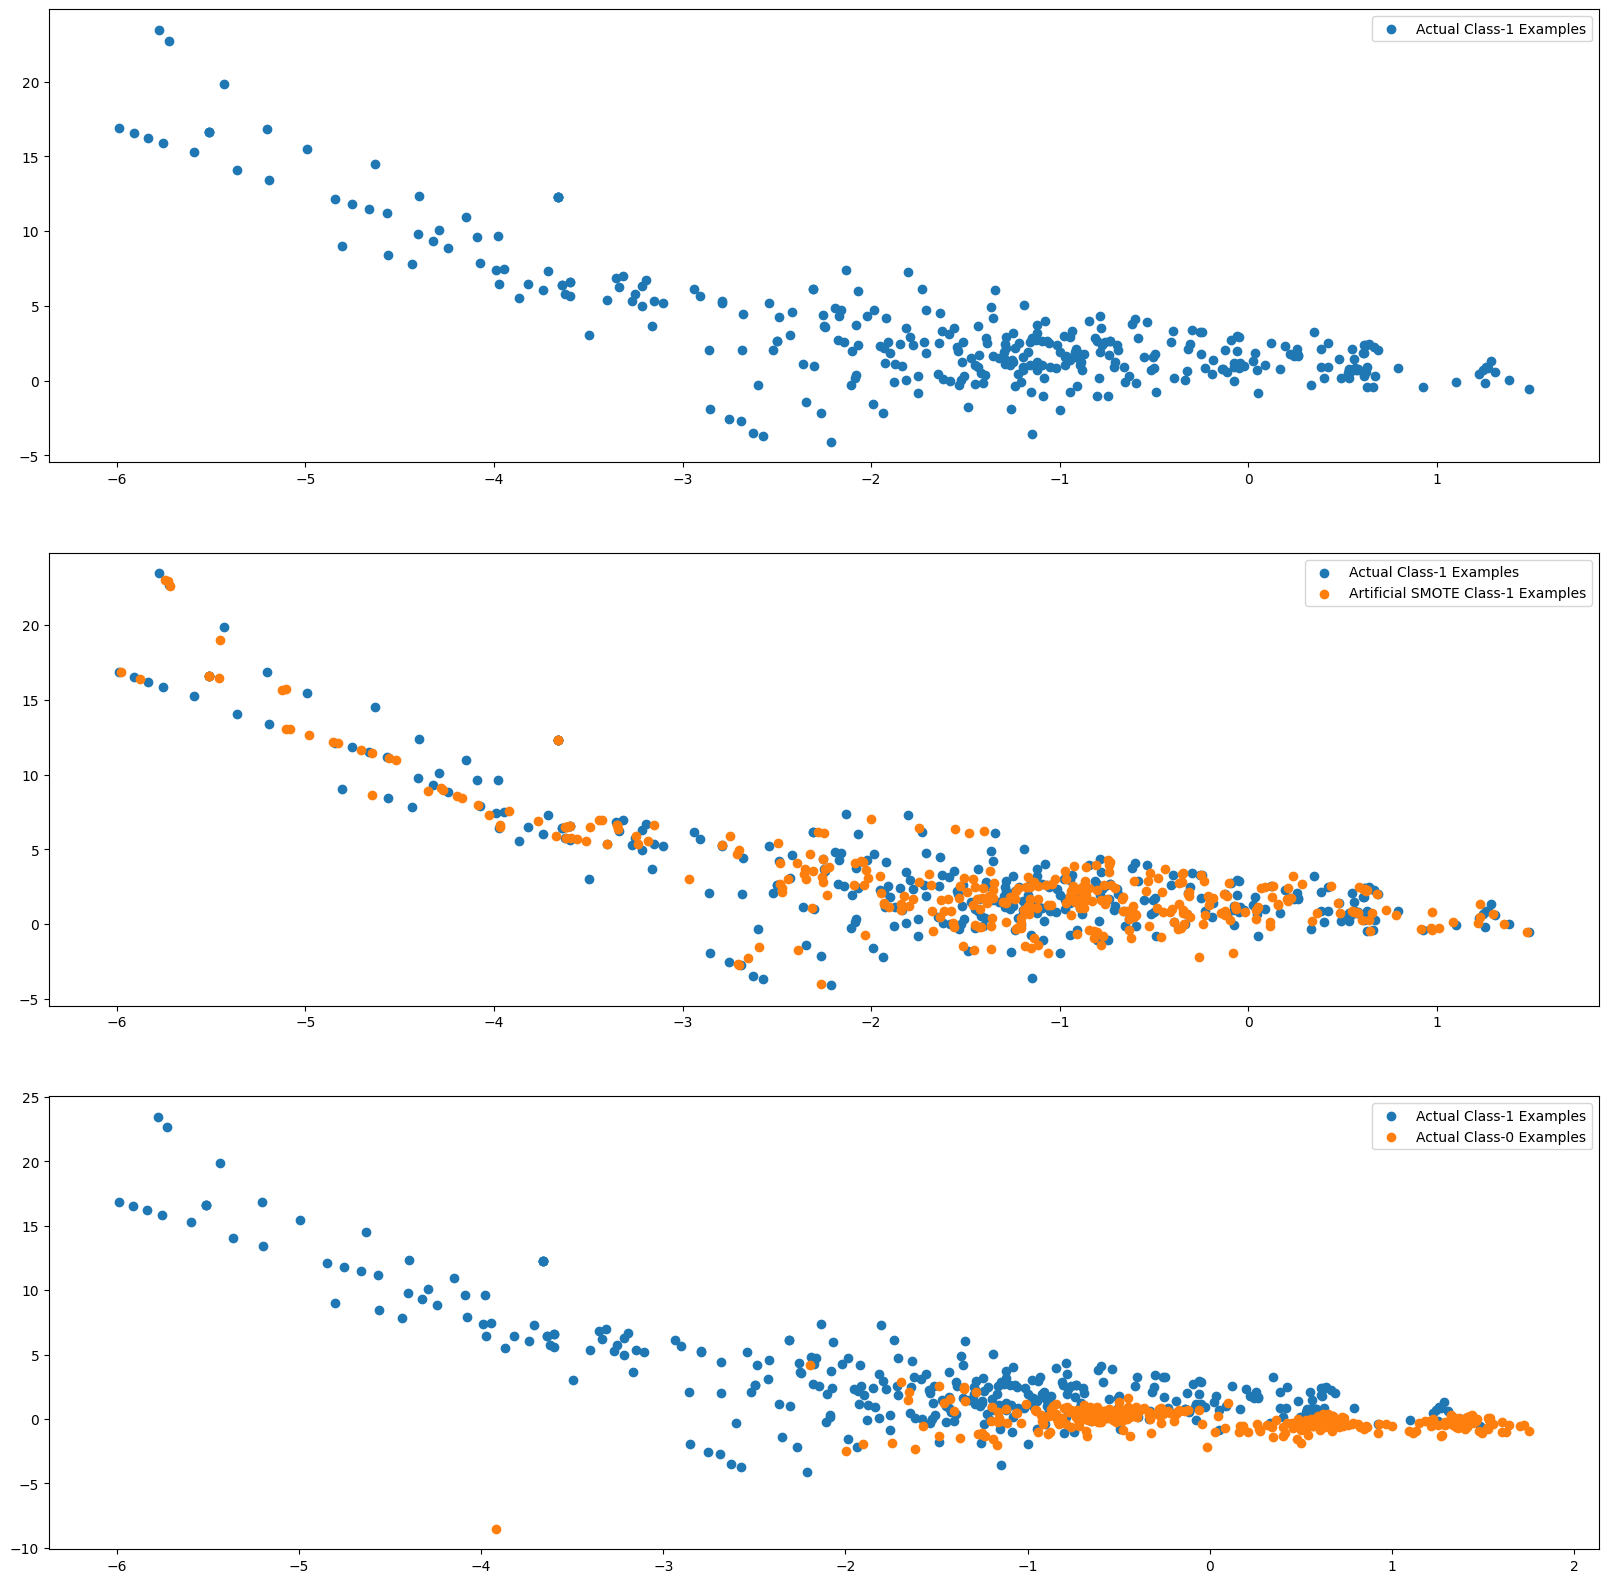

In [99]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

In [100]:
from imblearn.over_sampling import SMOTE

# define SMOTE strategy
smote = SMOTE(sampling_strategy='minority')
# fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)


In [101]:
from collections import Counter

# Before sampling class distribution
print('Before sampling class distribution:', Counter(y_train))

# Define SMOTE strategy
smote = SMOTE(sampling_strategy='minority')

# Fit and apply the transform
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# New class distribution
print('New class distribution:', Counter(y_smote))


Before sampling class distribution: Counter({0: 199020, 1: 344})
New class distribution: Counter({0: 199020, 1: 199020})


### Model 7: Logistic Regression with SMOTE

In [102]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv_log_smote = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True, random_state=4)

# Fit the model
model_cv_log_smote.fit(X_smote, y_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_log_smote.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_log_smote.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9903701635640942
Best hyperparameters:  {'C': 1000}


**Building Logistic Regression with optimal C**

In [103]:
# Instantiating the model
logreg_smote = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_smote_model = logreg_smote.fit(X_smote, y_smote)

**Evaluation on Train Dataset**

In [104]:
# Predictions on the train set
y_train_pred_smote_log = logreg_smote_model.predict(X_smote)

# Printing scores
display_scores(y_smote, y_train_pred_smote_log)

# Printing Recall
recall_train_smote_log = round(metrics.recall_score(y_smote, y_train_pred_smote_log),4)
print("Recall on train data:",recall_train_smote_log)

F1 Score: 94.84%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Recall on train data: 0.9264


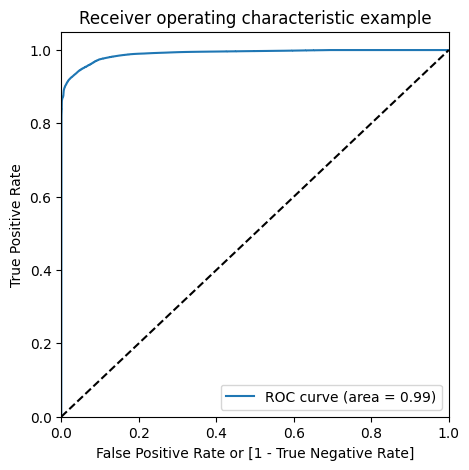

In [105]:
# Predicted probability
y_train_pred_proba_smote_log = logreg_smote_model.predict_proba(X_smote)[:,1]
# Plot the ROC curve
draw_roc(y_smote, y_train_pred_proba_smote_log)

In [106]:
auc_train_smote_log = round(roc_auc_score(y_smote, y_train_pred_proba_smote_log),2)
print("Area under ROC curve (AUC):",auc_train_smote_log)

Area under ROC curve (AUC): 0.99


**Evaluation on Test Dataset**

In [107]:
# Prediction on test data
y_test_pred_smote_log = logreg_smote_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_smote_log)

# Printing Recall
recall_test_smote_log = round(metrics.recall_score(y_test, y_test_pred_smote_log),4)
print("Recall on test data:", recall_test_smote_log)

F1 Score: 10.59%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85295
           1       0.06      0.89      0.11       148

    accuracy                           0.97     85443
   macro avg       0.53      0.93      0.55     85443
weighted avg       1.00      0.97      0.99     85443

Recall on test data: 0.8919


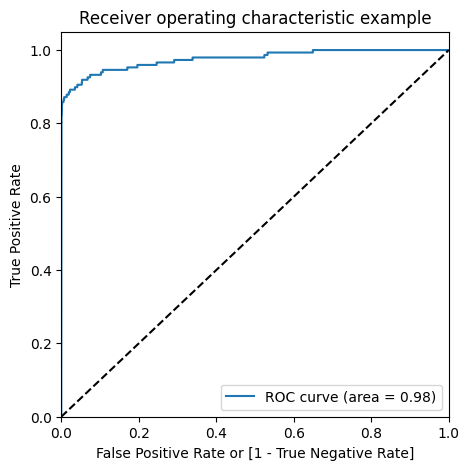

In [108]:
# Predicted probability
y_test_pred_proba_smote_log = logreg_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote_log)

In [109]:
auc_test_smote_log = round(roc_auc_score(y_test, y_test_pred_proba_smote_log),2)
print("Area under ROC curve (AUC):", auc_test_smote_log)

Area under ROC curve (AUC): 0.98


In [110]:
# Printing key observations
data_smote_log = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_smote_log, recall_test_smote_log],
    'AUC': [auc_train_smote_log, auc_test_smote_log]
}

df_smote_log = pd.DataFrame(data_smote_log)

# Print the DataFrame
print(df_smote_log)

  Dataset  Recall   AUC
0   Train  0.9264  0.99
1    Test  0.8919  0.98


## Model 8: Decision Tree with SMOTE

In [111]:
# Define the parameter grid for Decision Tree
params = {
    "max_depth": [2,3,4],
    "min_samples_split": [15,20,25,30],
    "min_samples_leaf": [5,10,15,20],
}

# Define the number of folds for cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation with RandomizedSearchCV
model_cv_dt_smote = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                              param_distributions=params,
                              scoring='roc_auc',
                              cv=folds,
                              n_jobs=-1,
                              verbose=1,
                              return_train_score=True,
                              random_state=42)

# Perform hyperparameter tuning
model_cv_dt_smote.fit(X_smote, y_smote)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_dt_smote.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best hyperparameters:  {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 4}


In [112]:
# Model with optimal hyperparameters
dt_smote_model = DecisionTreeClassifier( random_state = 42,**model_cv_dt_smote.best_params_)

dt_smote_model.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=15,
                       random_state=42)

**Evaluation on train data**

In [113]:
# Predictions on the train set
y_train_pred_smote_dt = dt_smote_model.predict(X_smote)

# Printing scores
display_scores(y_smote, y_train_pred_smote_dt)

# Printing Recall
recall_train_smote_dt = round(metrics.recall_score(y_smote, y_train_pred_smote_dt),4)
print("Recall on train data:",recall_train_smote_dt)

F1 Score: 95.09%
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95    199020
           1       0.97      0.93      0.95    199020

    accuracy                           0.95    398040
   macro avg       0.95      0.95      0.95    398040
weighted avg       0.95      0.95      0.95    398040

Recall on train data: 0.9336


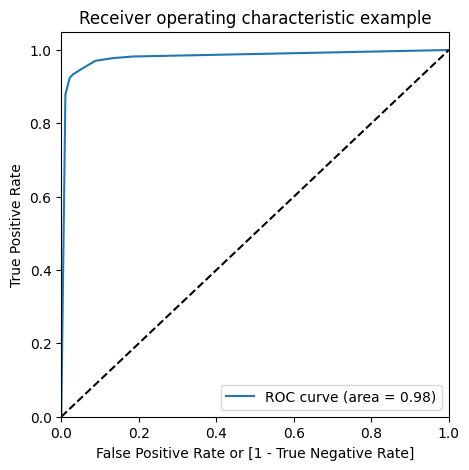

In [114]:
# Predicted probability
y_train_pred_proba_smote_dt = dt_smote_model.predict_proba(X_smote)[:,1]
# Plot the ROC curve
draw_roc(y_smote, y_train_pred_proba_smote_dt)

In [115]:
auc_train_smote_dt = round(roc_auc_score(y_over, y_train_pred_proba_smote_dt),2)
print("Area under ROC curve (AUC):",auc_train_smote_dt)

Area under ROC curve (AUC): 0.98


**Evaluation on Test Data**

In [116]:
# Making Predictions on test data
y_test_pred_smote_dt = dt_smote_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_smote_dt)

# Printing Recall
recall_test_smote_dt = round(metrics.recall_score(y_test, y_test_pred_smote_dt),4)
print("Recall on test data:", recall_test_smote_dt)

F1 Score: 8.94%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85295
           1       0.05      0.84      0.09       148

    accuracy                           0.97     85443
   macro avg       0.52      0.91      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Recall on test data: 0.8446


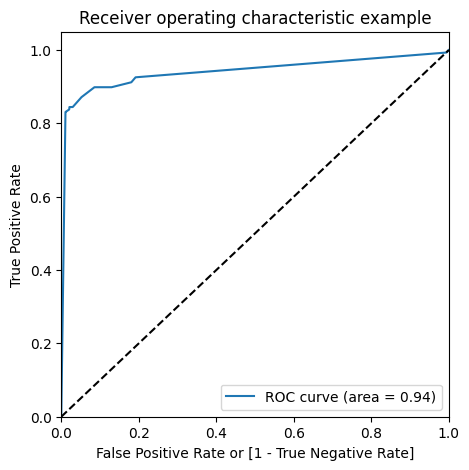

In [117]:
# Predicted probability
y_test_pred_proba_smote_dt = dt_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote_dt)

In [118]:
auc_test_smote_dt = round(roc_auc_score(y_test, y_test_pred_proba_smote_dt),2)
print("Area under ROC curve (AUC):", auc_test_smote_dt)

Area under ROC curve (AUC): 0.94


In [119]:
# Printing key observations
data_smote_dt = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_smote_dt, recall_test_smote_dt],
    'AUC': [auc_train_smote_dt, auc_test_smote_dt]
}

df_smote_dt = pd.DataFrame(data_smote_dt)

# Print the DataFrame
print(df_smote_dt)

  Dataset  Recall   AUC
0   Train  0.9336  0.98
1    Test  0.8446  0.94


## Model 9: XGBoost with SMOTE

In [120]:
folds = 3

param_grid = {
    'n_estimators': [700,800,900],
    'learning_rate': [0.005, 0.001, 0.003],
    'max_depth': [2, 3, 4],
    'reg_lambda': [0.8,0.9, 1, 1.1],
    'reg_alpha': [0.2,0.3,0.4],
    'min_child_weight': [3, 4, 5, 6],
    'gamma': [0.9,1, 1.1],
}

xgb_model_smote = XGBClassifier()

model_cv_xgb_smote = RandomizedSearchCV(
    estimator=xgb_model_smote,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=folds,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

model_cv_xgb_smote.fit(X_smote, y_smote)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_xgb_smote.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_xgb_smote.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9979156457613061
Best hyperparameters:  {'reg_lambda': 1, 'reg_alpha': 0.3, 'n_estimators': 800, 'min_child_weight': 4, 'max_depth': 4, 'learning_rate': 0.005, 'gamma': 1}


In [121]:
# Model with optimal hyperparameters
xgb_smote_model = XGBClassifier( random_state = 42,**model_cv_xgb_smote.best_params_)

xgb_smote_model.fit(X_smote, y_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Evaluation on Training dataset**

In [122]:
# Making Predictions on Train Data
y_train_pred_smote_xgb = xgb_smote_model.predict(X_smote)

# Printing Classification Report
display_scores(y_smote, y_train_pred_smote_xgb)

# Printing Recall
recall_train_smote_xgb = round(metrics.recall_score(y_smote, y_train_pred_smote_xgb),4)
print("Recall on train data:",recall_train_smote_xgb)

F1 Score: 97.28%
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97    199020
           1       0.99      0.96      0.97    199020

    accuracy                           0.97    398040
   macro avg       0.97      0.97      0.97    398040
weighted avg       0.97      0.97      0.97    398040

Recall on train data: 0.9571


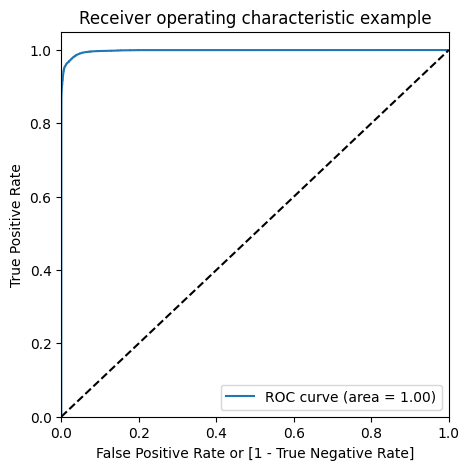

In [123]:
# Predicted probability
y_train_pred_proba_smote_xgb = xgb_smote_model.predict_proba(X_smote)[:,1]

# Plot the ROC curve
draw_roc(y_smote, y_train_pred_proba_smote_xgb)

In [124]:
auc_train_smote_xgb = round(roc_auc_score(y_smote, y_train_pred_proba_smote_xgb),2)
print("Area under ROC curve (AUC):",auc_train_smote_xgb)

Area under ROC curve (AUC): 1.0


**Evaluation on Test Dataset**

In [125]:
# Making Predictions on Train Data
y_test_pred_smote_xgb = xgb_smote_model.predict(X_test)

# Printing Classification Report
display_scores(y_test, y_test_pred_smote_xgb)

# Printing Recall
recall_test_smote_xgb = round(metrics.recall_score(y_test, y_test_pred_smote_xgb),4)
print("Recall on test data:",recall_test_smote_xgb)

F1 Score: 21.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.12      0.86      0.21       148

    accuracy                           0.99     85443
   macro avg       0.56      0.93      0.60     85443
weighted avg       1.00      0.99      0.99     85443

Recall on test data: 0.8649


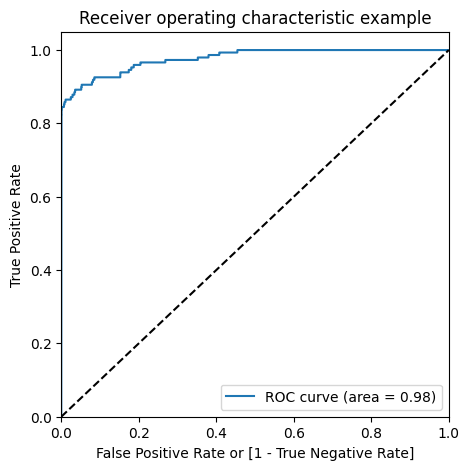

In [126]:
# Predicted probability
y_test_pred_proba_smote_xgb = xgb_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote_xgb)

In [127]:
auc_test_smote_xgb = round(roc_auc_score(y_test, y_test_pred_proba_smote_xgb),2)
print("Area under ROC curve (AUC):", auc_test_smote_xgb)

Area under ROC curve (AUC): 0.98


In [128]:
# Printing key observations
data_smote_xgb = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_smote_xgb, recall_test_smote_xgb],
    'AUC': [auc_train_smote_xgb, auc_test_smote_xgb]
}

df_smote_xgb = pd.DataFrame(data_smote_xgb)

# Print the DataFrame
print(df_smote_xgb)

  Dataset  Recall   AUC
0   Train  0.9571  1.00
1    Test  0.8649  0.98


## ADASYN (Adaptive Synthetic Sampling)

### Print the class distribution after applying ADASYN

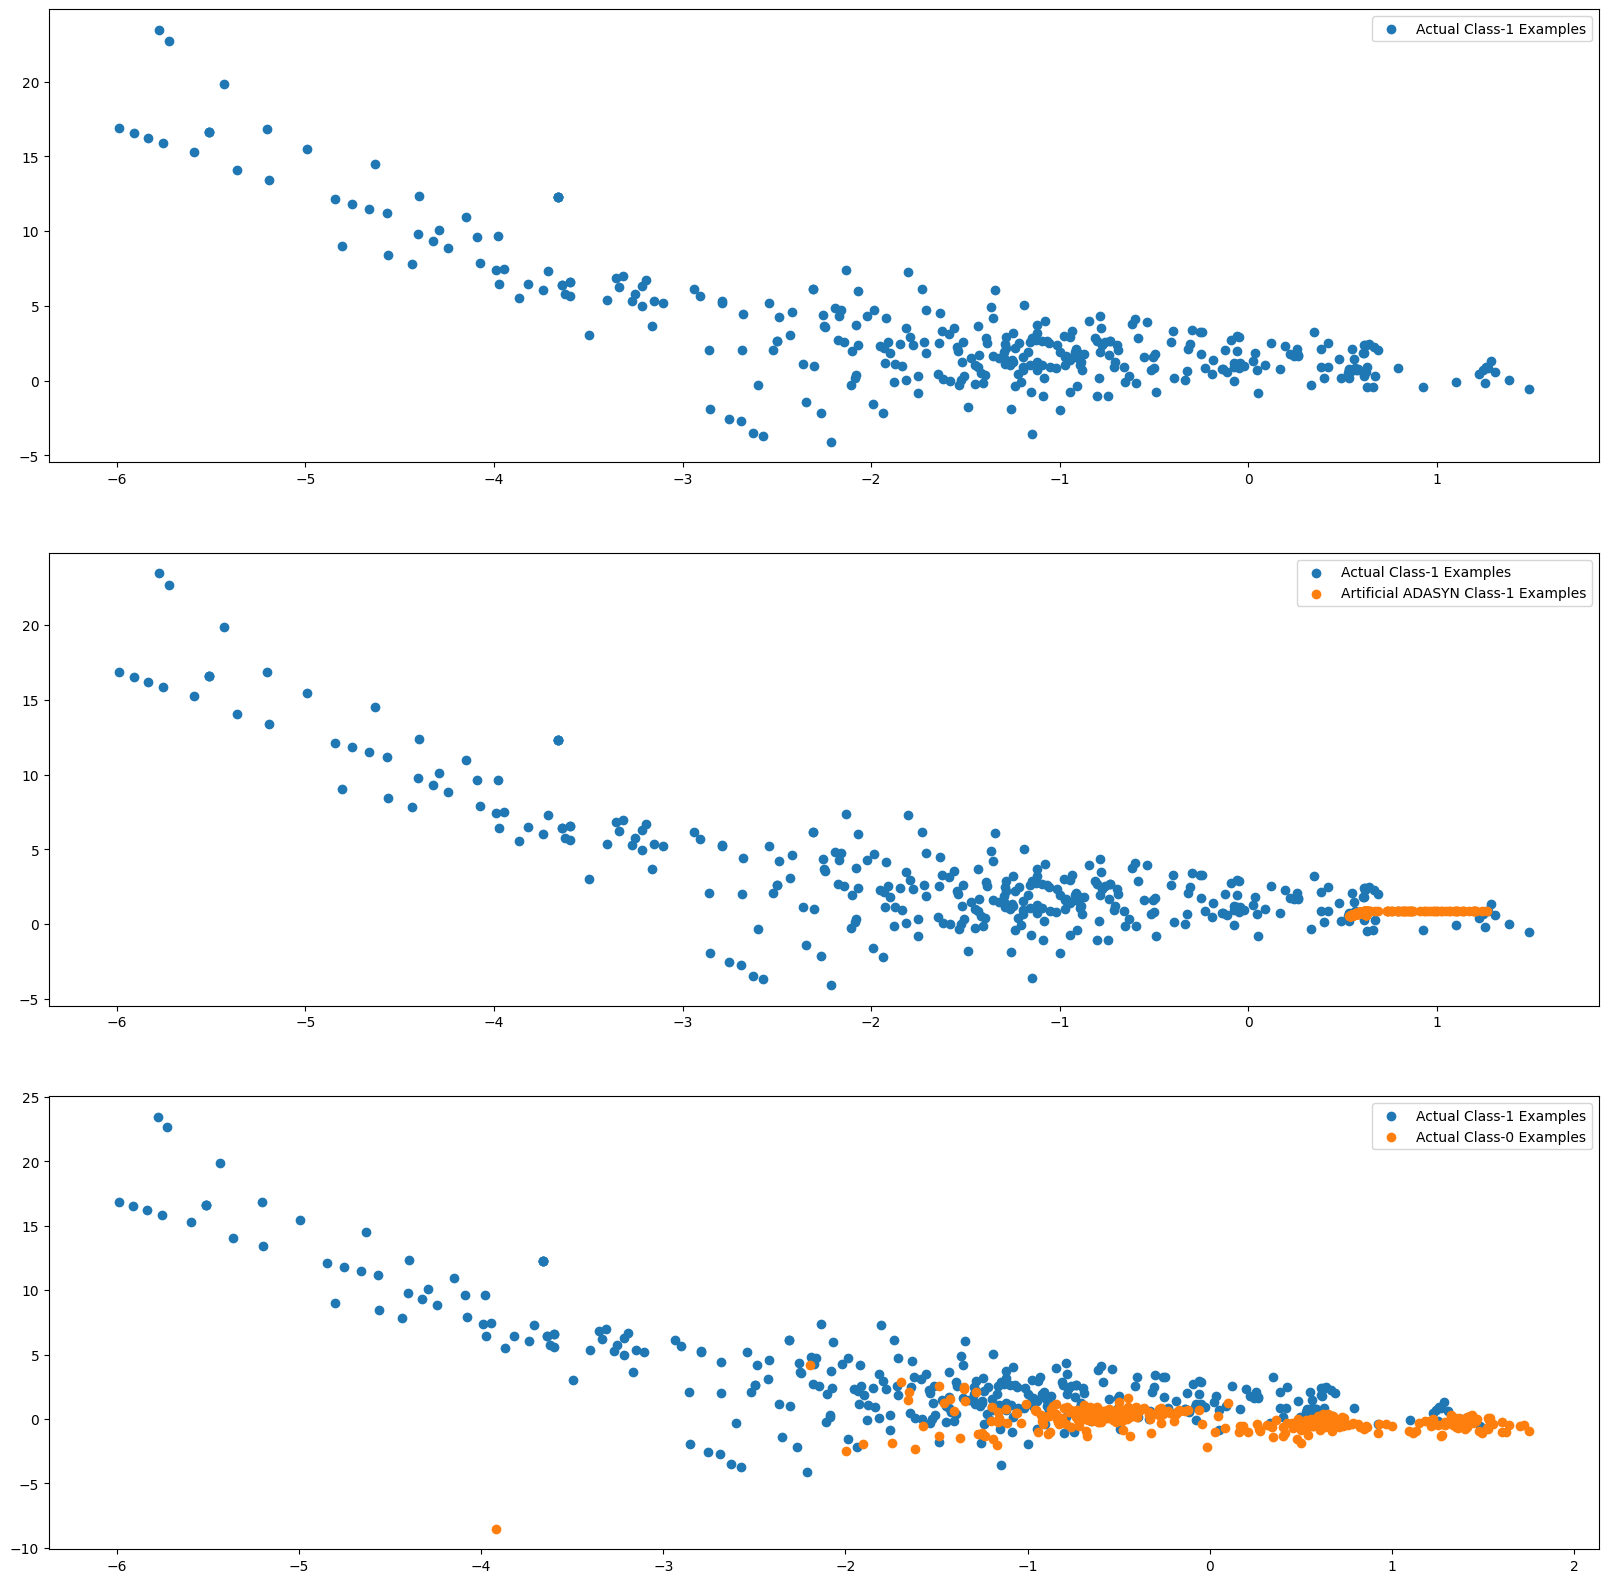

In [129]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

plt.show()


In [130]:
from imblearn.over_sampling import ADASYN

# define oversampling strategy
adasyn = ADASYN(sampling_strategy='minority')
# fit and apply the transform
X_adasyn, y_adasyn = adasyn.fit_resample(X_train, y_train)

from collections import Counter
# Before sampling class distribution
print('Before sampling class distribution:-', Counter(y_train))
# New class distribution
print('New class distribution:-', Counter(y_adasyn))


Before sampling class distribution:- Counter({0: 199020, 1: 344})
New class distribution:- Counter({1: 199056, 0: 199020})


## Model 10: Logistic Regression with ADASYN

In [131]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv_log_adasyn = RandomizedSearchCV(estimator = LogisticRegression(),
                        param_distributions = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True, random_state=4)

# Fit the model
model_cv_log_adasyn.fit(X_adasyn, y_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv_log_adasyn.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_log_adasyn.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9669973458883272
Best hyperparameters:  {'C': 1000}


In [132]:
# Instantiating the model
logreg_adasyn = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_adasyn_model = logreg_adasyn.fit(X_adasyn, y_adasyn)

**Evaluation on Train Dataset**

In [166]:
# Predictions on the train set
y_train_pred_adasyn_log = logreg_adasyn_model.predict(X_adasyn)

# Printing scores
display_scores(y_adasyn, y_train_pred_adasyn_log)

recall_train_adasyn_log = metrics.recall_score(y_adasyn, y_train_pred_adasyn_log)
print("Recall on train data:", round(recall_train_adasyn_log,4))

F1 Score: 89.81%
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    199020
           1       0.91      0.89      0.90    199056

    accuracy                           0.90    398076
   macro avg       0.90      0.90      0.90    398076
weighted avg       0.90      0.90      0.90    398076

Recall on train data: 0.8885


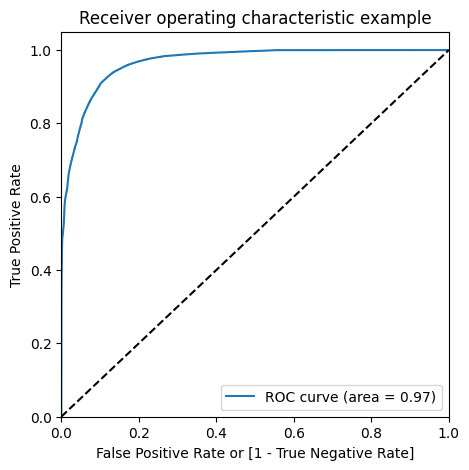

In [134]:
# Predicted probability
y_train_pred_proba_adasyn_log = logreg_adasyn_model.predict_proba(X_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_adasyn, y_train_pred_proba_adasyn_log)

In [135]:
auc_train_adasyn_log = round(roc_auc_score(y_adasyn, y_train_pred_proba_adasyn_log),2)
print("Area under ROC curve (AUC):",auc_train_adasyn_log)

Area under ROC curve (AUC): 0.97


**Evaluation on Test Dataset**

In [167]:
# Evaluating on test data
y_test_pred_adasyn_log = logreg_adasyn_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_adasyn_log)

# Printing Recall
recall_test_adasyn_log = metrics.recall_score(y_test, y_test_pred_adasyn_log)
print("Recall on Test data:", round(recall_test_adasyn_log,4))

F1 Score: 3.51%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85295
           1       0.02      0.93      0.04       148

    accuracy                           0.91     85443
   macro avg       0.51      0.92      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Recall on Test data: 0.9324


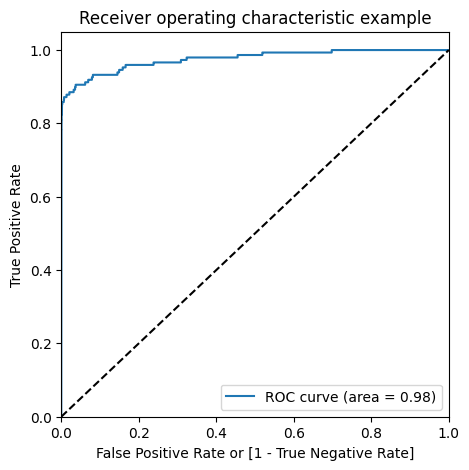

In [137]:
# Predicted probability
y_test_pred_proba_adasyn_log = logreg_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_adasyn_log)

In [138]:
auc_test_adasyn_log = round(roc_auc_score(y_test, y_test_pred_proba_adasyn_log),2)
print("Area under ROC curve (AUC):", auc_test_adasyn_log)

Area under ROC curve (AUC): 0.98


In [168]:
# Printing key observations
data_adasyn_log = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_adasyn_log, recall_test_adasyn_log],
    'AUC': [auc_train_adasyn_log, auc_test_adasyn_log]
}

df_adasyn_log = pd.DataFrame(data_adasyn_log)

# Print the DataFrame
print(df_adasyn_log)

  Dataset    Recall   AUC
0   Train  0.888509  0.97
1    Test  0.932432  0.98


## Model 11:Decision Tree with ADASYN

In [140]:
# Define the parameter grid for Decision Tree
params = {
    "max_depth": [2,3,4],
    "min_samples_split": [15,20,25,30 ],
    "min_samples_leaf": [5,10,15,20]
}

# Define the number of folds for cross-validation
folds = KFold(n_splits=3, shuffle=True, random_state=42)

# Perform cross-validation with RandomizedSearchCV
model_cv_dt_adasyn = RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                              param_distributions=params,
                              scoring='roc_auc',
                              cv=folds,
                              n_jobs=-1,
                              verbose=1,
                              return_train_score=True,
                              random_state=42)

# Perform hyperparameter tuning
model_cv_dt_adasyn.fit(X_adasyn, y_adasyn)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_dt_adasyn.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_dt_adasyn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9589493277926037
Best hyperparameters:  {'min_samples_split': 15, 'min_samples_leaf': 15, 'max_depth': 4}


In [141]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier( random_state = 42,**model_cv_dt_adasyn.best_params_)

dt_adasyn_model.fit(X_adasyn, y_adasyn)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=15, min_samples_split=15,
                       random_state=42)

**Evaluation on Train Dataset**

In [142]:
# Predictions on the train set
y_train_pred_adasyn_dt= dt_adasyn_model.predict(X_adasyn)

# Printing scores
display_scores(y_adasyn, y_train_pred_adasyn_dt)

# Printing Recall
recall_train_adasyn_dt = metrics.recall_score(y_adasyn, y_train_pred_adasyn_dt)
print("Recall on train data:", round(recall_train_adasyn_dt,2))

F1 Score: 91.22%
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.89      0.91    199020
           1       0.90      0.93      0.91    199056

    accuracy                           0.91    398076
   macro avg       0.91      0.91      0.91    398076
weighted avg       0.91      0.91      0.91    398076

Recall on train data: 0.93


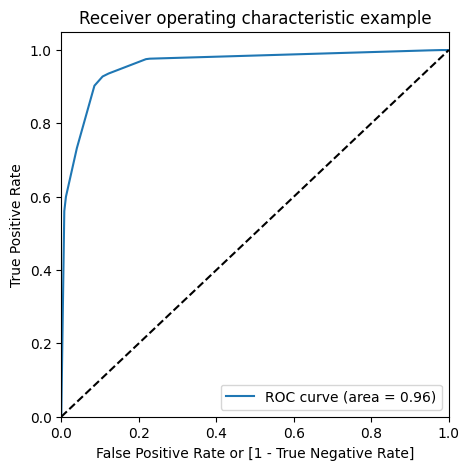

In [143]:
# Predicted probability
y_train_pred_proba_adasyn_dt = dt_adasyn_model.predict_proba(X_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_adasyn, y_train_pred_proba_adasyn_dt)

In [169]:
auc_train_adasyn_dt = round(roc_auc_score(y_adasyn, y_train_pred_proba_adasyn_dt),4)
print("Area under ROC curve (AUC):",auc_train_adasyn_dt)

Area under ROC curve (AUC): 0.9588


**Evaluation on Test Data**

In [170]:
# Evaluating on test data
y_test_pred_adasyn_dt = dt_adasyn_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_adasyn_dt)

# Printing Recall
recall_test_adasyn_dt = metrics.recall_score(y_test, y_test_pred_adasyn_dt)
print("Recall on Test data:", round(recall_test_adasyn_dt,4))

F1 Score: 2.92%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.94     85295
           1       0.01      0.91      0.03       148

    accuracy                           0.90     85443
   macro avg       0.51      0.90      0.49     85443
weighted avg       1.00      0.90      0.94     85443

Recall on Test data: 0.9054


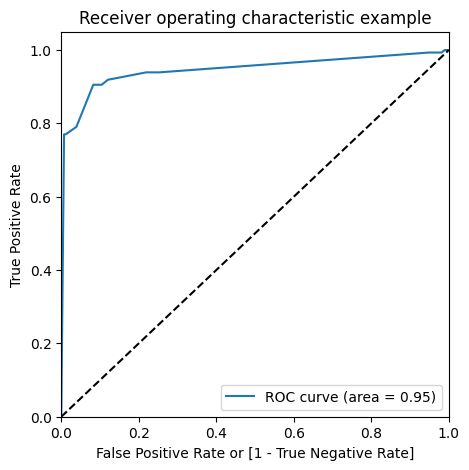

In [146]:
# Predicted probability
y_test_pred_proba_adasyn_dt = dt_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_adasyn_dt)

In [147]:
auc_test_adasyn_dt = round(roc_auc_score(y_test, y_test_pred_proba_adasyn_dt),2)
print("Area under ROC curve (AUC):", auc_test_adasyn_dt)

Area under ROC curve (AUC): 0.95


In [171]:
# Printing key observations
data_adasyn_dt = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_adasyn_dt, recall_test_adasyn_dt],
    'AUC': [auc_train_adasyn_dt, auc_test_adasyn_dt]
}

df_adasyn_dt = pd.DataFrame(data_adasyn_dt)

# Print the DataFrame
print(df_adasyn_dt)

  Dataset    Recall     AUC
0   Train  0.927905  0.9588
1    Test  0.905405  0.9500


## Model 12: XGBoost with ADASYN

In [149]:
folds = 3

param_grid = {
    'n_estimators': [900, 950,1000],
    'learning_rate': [0.005, 0.001, 0.003],
    'max_depth': [2, 3],
    'reg_lambda': [0.7,0.8,0.9],
    'reg_alpha': [0.2, 0.3,0.4],
    'min_child_weight': [6,7,8,9],
    'gamma': [0.8,0.9,1]
}

xgb_model_adasyn = XGBClassifier()

model_cv_xgb_adasyn = RandomizedSearchCV(
    estimator=xgb_model_adasyn,
    param_distributions=param_grid,
    scoring='roc_auc',
    cv=folds,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

model_cv_xgb_adasyn.fit(X_adasyn, y_adasyn)

# Print the evaluation result by choosing an evaluation metric
print('Best ROC AUC score: ', model_cv_xgb_adasyn.best_score_)

# Print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv_xgb_adasyn.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best ROC AUC score:  0.9796757892383191
Best hyperparameters:  {'reg_lambda': 0.9, 'reg_alpha': 0.3, 'n_estimators': 1000, 'min_child_weight': 9, 'max_depth': 3, 'learning_rate': 0.005, 'gamma': 0.9}


In [150]:
# Model with optimal hyperparameters
xgb_adasyn_model = XGBClassifier( random_state = 42,**model_cv_xgb_adasyn.best_params_)

xgb_adasyn_model.fit(X_adasyn, y_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.9, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.005, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=9, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

**Evaluation on Train Data**

In [151]:
# Making predictions on train data
y_train_pred_adasyn_xgb = xgb_adasyn_model.predict(X_adasyn)

# Printing Classification report
display_scores(y_adasyn, y_train_pred_adasyn_xgb)

# Printing Recall
recall_train_adasyn_xgb = metrics.recall_score(y_adasyn, y_train_pred_adasyn_xgb)
print("Recall on train data:", round(recall_train_adasyn_xgb,4))

F1 Score: 95.96%
Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.95      0.96    199020
           1       0.95      0.97      0.96    199056

    accuracy                           0.96    398076
   macro avg       0.96      0.96      0.96    398076
weighted avg       0.96      0.96      0.96    398076

Recall on train data: 0.9697


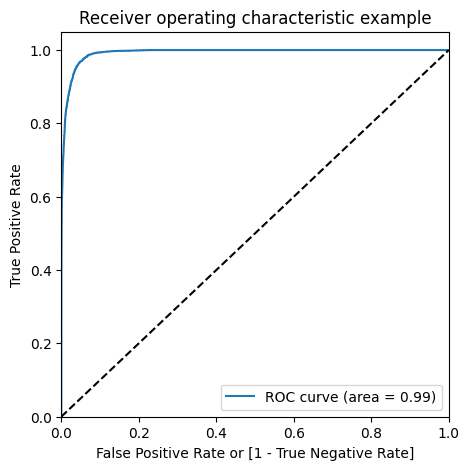

In [152]:
# Predicted probability
y_train_pred_proba_adasyn_xgb = xgb_adasyn_model.predict_proba(X_adasyn)[:,1]

# Plot the ROC curve
draw_roc(y_adasyn, y_train_pred_proba_adasyn_xgb)

In [153]:
auc_train_adasyn_xgb = round(roc_auc_score(y_adasyn, y_train_pred_proba_adasyn_xgb),2)
print("Area under ROC curve (AUC):",auc_train_adasyn_xgb)

Area under ROC curve (AUC): 0.99


**Evaluation on Test data**

In [154]:
# Evaluating on test data
y_test_pred_adasyn_xgb = xgb_adasyn_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred_adasyn_xgb)

# Printing Recall
recall_test_adasyn_xgb = metrics.recall_score(y_test, y_test_pred_adasyn_xgb)
print("Recall on Test data:", round(recall_test_adasyn_xgb,4))

F1 Score: 5.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.89      0.06       148

    accuracy                           0.95     85443
   macro avg       0.51      0.92      0.52     85443
weighted avg       1.00      0.95      0.97     85443

Recall on Test data: 0.8919


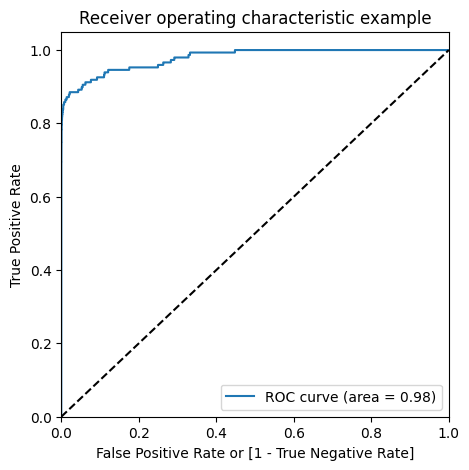

In [155]:
# Predicted probability
y_test_pred_proba_adasyn_xgb = xgb_adasyn_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_adasyn_xgb)

In [156]:
auc_test_adasyn_xgb = round(roc_auc_score(y_test, y_test_pred_proba_adasyn_xgb),2)
print("Area under ROC curve (AUC):", auc_test_adasyn_xgb)

Area under ROC curve (AUC): 0.98


In [159]:
# Printing key observations
data_adasyn_xgb = {
    'Dataset': ['Train', 'Test'],
    'Recall': [recall_train_adasyn_xgb, recall_test_adasyn_xgb],
    'AUC': [auc_train_adasyn_xgb, auc_test_adasyn_xgb]
}

df_adasyn_xgb = pd.DataFrame(data_adasyn_xgb)

# Print the DataFrame
print(df_adasyn_xgb)

  Dataset    Recall   AUC
0   Train  0.969747  0.99
1    Test  0.891892  0.98


## Comparison of models

In [173]:
# Concatenate DataFrames with keys for multi-level indexing
df_combined = pd.concat([
    df_imb_log, df_imb_dt, df_imb_xgb,
    df_over_log, df_over_dt, df_over_xgb,
    df_smote_log, df_smote_dt, df_smote_xgb,
    df_adasyn_log, df_adasyn_dt, df_adasyn_xgb
], keys=[
    'imbalanced_logistic', 'imbalanced_decision_tree', 'imbalanced_xgboost',
    'random_oversampling_logistic', 'random_oversampling_decision_tree', 'random_oversampling_xgboost',
    'smote_logistic', 'smote_decision_tree', 'smote_xgboost',
    'adasyn_logistic', 'adasyn_decision_tree', 'adasyn_xgboost'
], names=['Model', 'Row'])

# Reset index for better readability
df_combined.reset_index(level='Model', inplace=True)

# Print the concatenated DataFrame
print(df_combined)


                                 Model Dataset    Recall     AUC
Row                                                             
0                  imbalanced_logistic   Train  0.642400  0.9800
1                  imbalanced_logistic    Test  0.574300  0.9800
0             imbalanced_decision_tree   Train  0.796500  0.9200
1             imbalanced_decision_tree    Test  0.743200  0.9200
0                   imbalanced_xgboost   Train  0.837200  1.0000
1                   imbalanced_xgboost    Test  0.777000  0.9800
0         random_oversampling_logistic   Train  0.926200  0.9900
1         random_oversampling_logistic    Test  0.891900  0.9800
0    random_oversampling_decision_tree   Train  0.959200  0.9800
1    random_oversampling_decision_tree    Test  0.871600  0.9400
0          random_oversampling_xgboost   Train  0.947100  1.0000
1          random_oversampling_xgboost    Test  0.851400  0.9700
0                       smote_logistic   Train  0.926400  0.9900
1                       s

### Model Evaluation and Selection Process

**For selection of best model we have utilized following metrics**

**1.** **RECALL**
- Our primary objective in addressing credit card fraud detection is to achieve a high recall rate. High recall is essential for identifying a significant proportion of actual fraudulent transactions, providing a strong defense against potential high-value fraudulent activities.

- Considering the severe consequences banking institutions face, such as monetary losses, credibility damage, and loss of trust due to fraudulent transactions, prioritizing recall is a strategic choice. This focus helps safeguard both the financial well-being of banks and the interests of their customers.

**2.** **ROC-AUC SCORE**: The ROC-AUC score (Receiver Operating Characteristic - Area Under the Curve) is a crucial metric for evaluating the performance of credit card fraud detection models.

- The ROC curve plots the true positive rate against the false positive rate across different threshold settings. This visualization helps to understand the trade-offs between correctly identifying fraudulent transactions and incorrectly flagging legitimate transactions.

- Credit card fraud detection typically involves highly imbalanced datasets, where fraudulent transactions are much rarer than legitimate ones. The ROC-AUC score is particularly useful in such scenarios as it focuses on the model's ability to distinguish between classes rather than the overall accuracy, which can be misleading with imbalanced data.

### Best Model

We employed various techniques to address the class imbalance in our dataset, including Random Oversampling, SMOTE, and ADASYN. Subsequently, we used logistic regression, decision trees, and XGBoost algorithms to build models for each sampling method.

Upon analyzing the results, we found that the XGBoost model performed exceptionally well on the dataset balanced with the ADASYN technique. It achieved a **96.9% Recall on Train data** and **89.1% Recall on Test Data** and also **99% ROC-AUC score for train data** and **98% ROC-AUC score for test data**.

Therefore, we conclude that the **XGBoost model with ADASYN is the optimal model for our dataset**.

### Print the important features of the best model to understand the dataset

Top var = 4
2nd Top var = 14
3rd Top var = 7


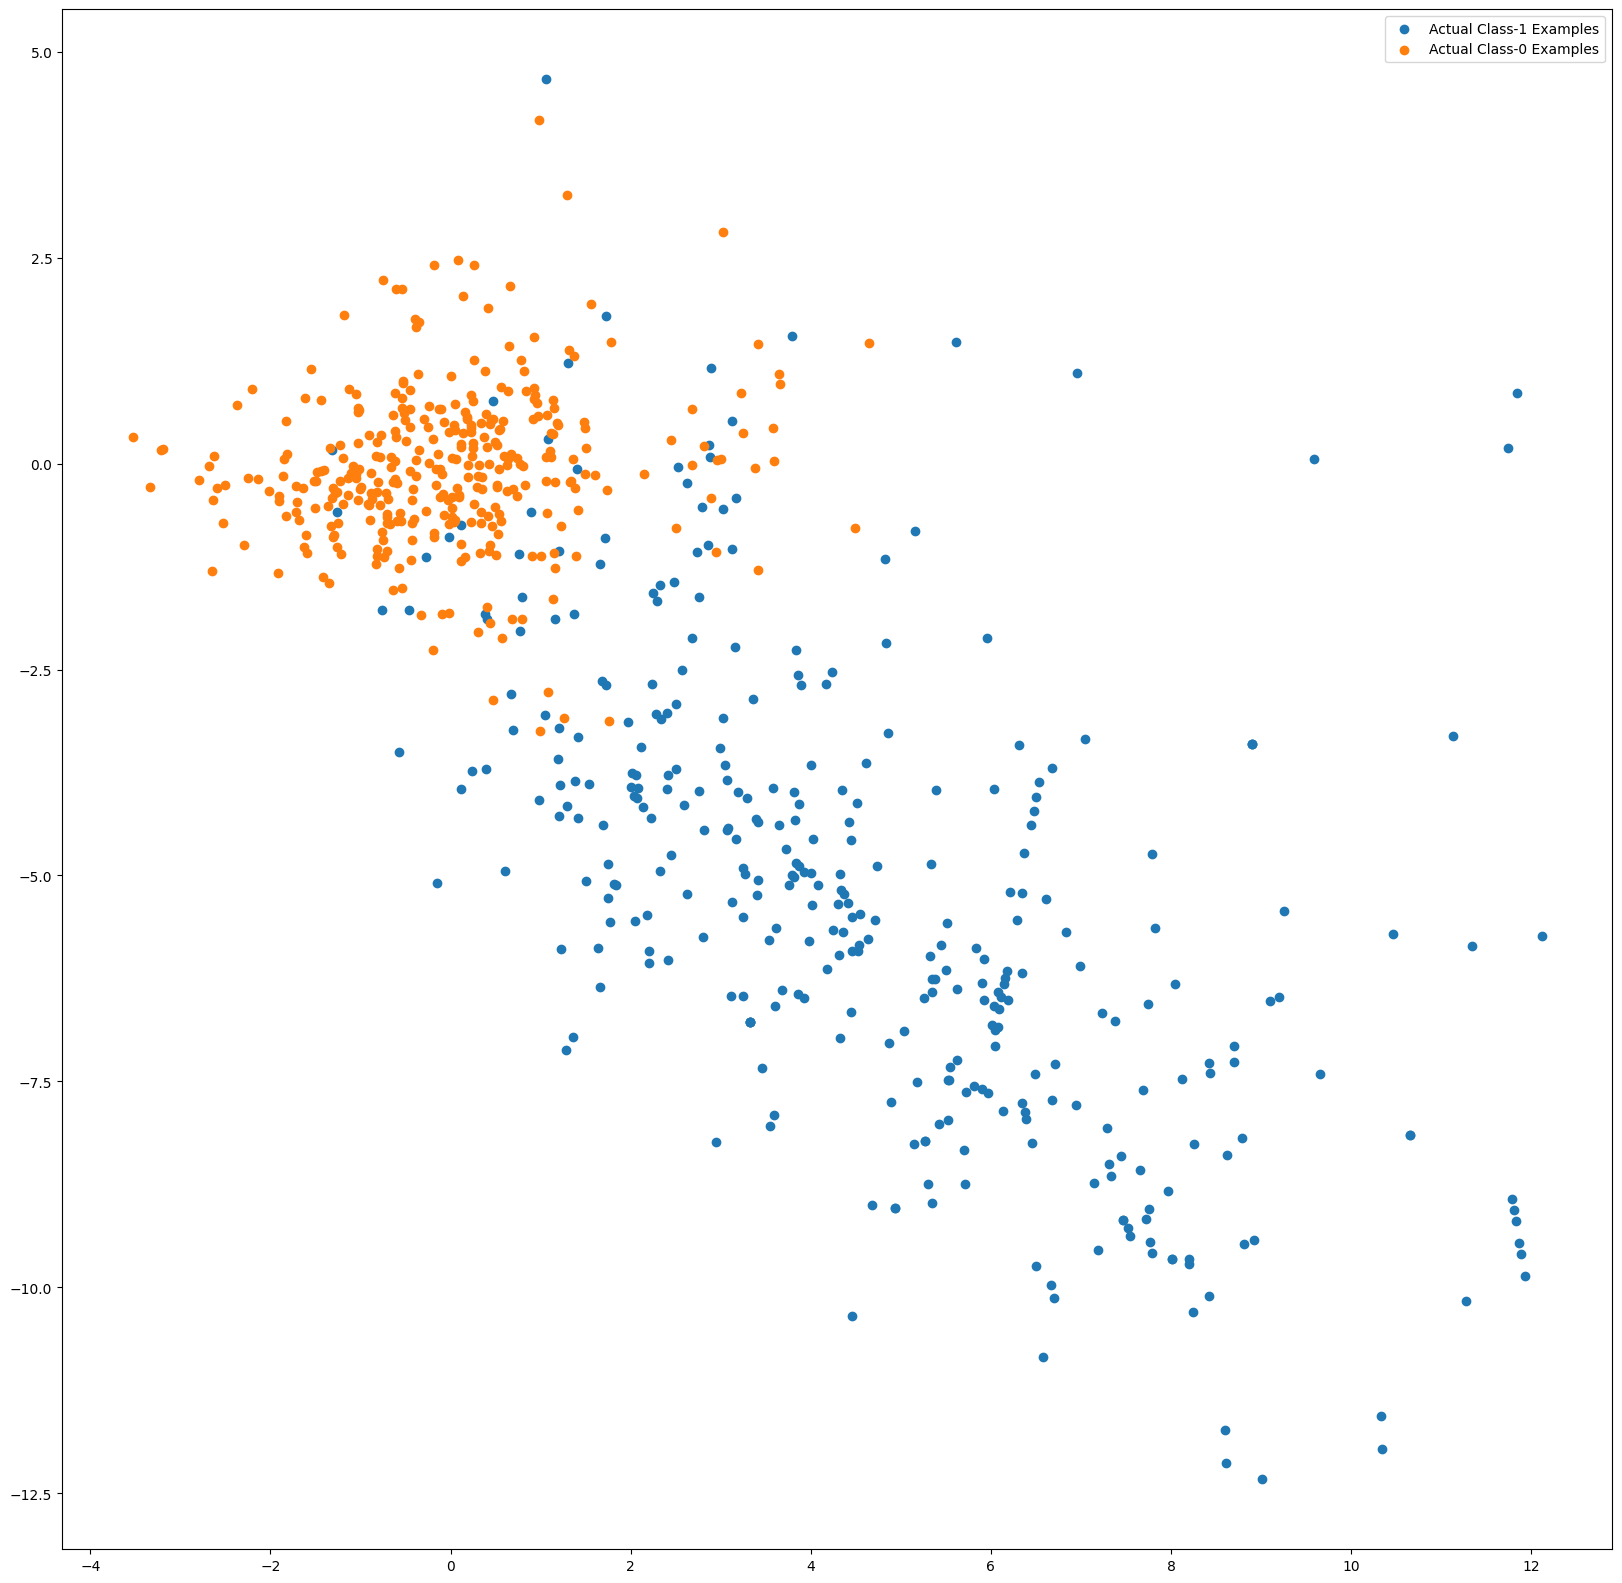

In [174]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

### Print the FPR,TPR & select the best threshold from the roc curve

In [175]:
print('Train auc =', (metrics.roc_auc_score(y_adasyn, y_train_pred_proba_adasyn_xgb)))
fpr, tpr, thresholds = metrics.roc_curve(y_adasyn, y_train_pred_proba_adasyn_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 0.9924106581199125
0.5165675
